In [ ]:
# The yolov8 model is trained using Google Colab, so just the necessary files are exported to this project

In [1]:
# import necessary libraries
from IPython.display import Image, display
import os
from IPython import display
display.clear_output()

In [16]:
# install the roboflow dataset, this dataset is created by me using the mnist dataset previously exported in this project
# it has 180 images per digit, 90 of them in their original sizes and 90 of them in random sizes in order to be able
# to detect all sizes of digits
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="CtApa0G4J3YNfbq3UAhI")
project = rf.workspace("object-detection-uscpv").project("mnist-a64ay")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.41, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to mnist-5 in yolov8:: 100%|█| 3612/3612 [00:00<0


In [19]:
# This stage is compiled using Google Colab since it gives a GPU usage service, so some unnecessary files not exported.
# the yolov8 model is trained with the installed dataset in the previous stage
# the model works through the whole dataset 50 times
# image sizes are extended to 640x640 by default by roboflow
!yolo task=detect mode=train model=yolov8s.pt data=../../yolov8_datasets/european_dataset/mnist-5/data.yaml epochs=50 imgsz=640

Ultralytics YOLOv8.0.41 🚀 Python-3.9.13 torch-1.13.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=../../yolov8_datasets/european_dataset/mnist-5/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False

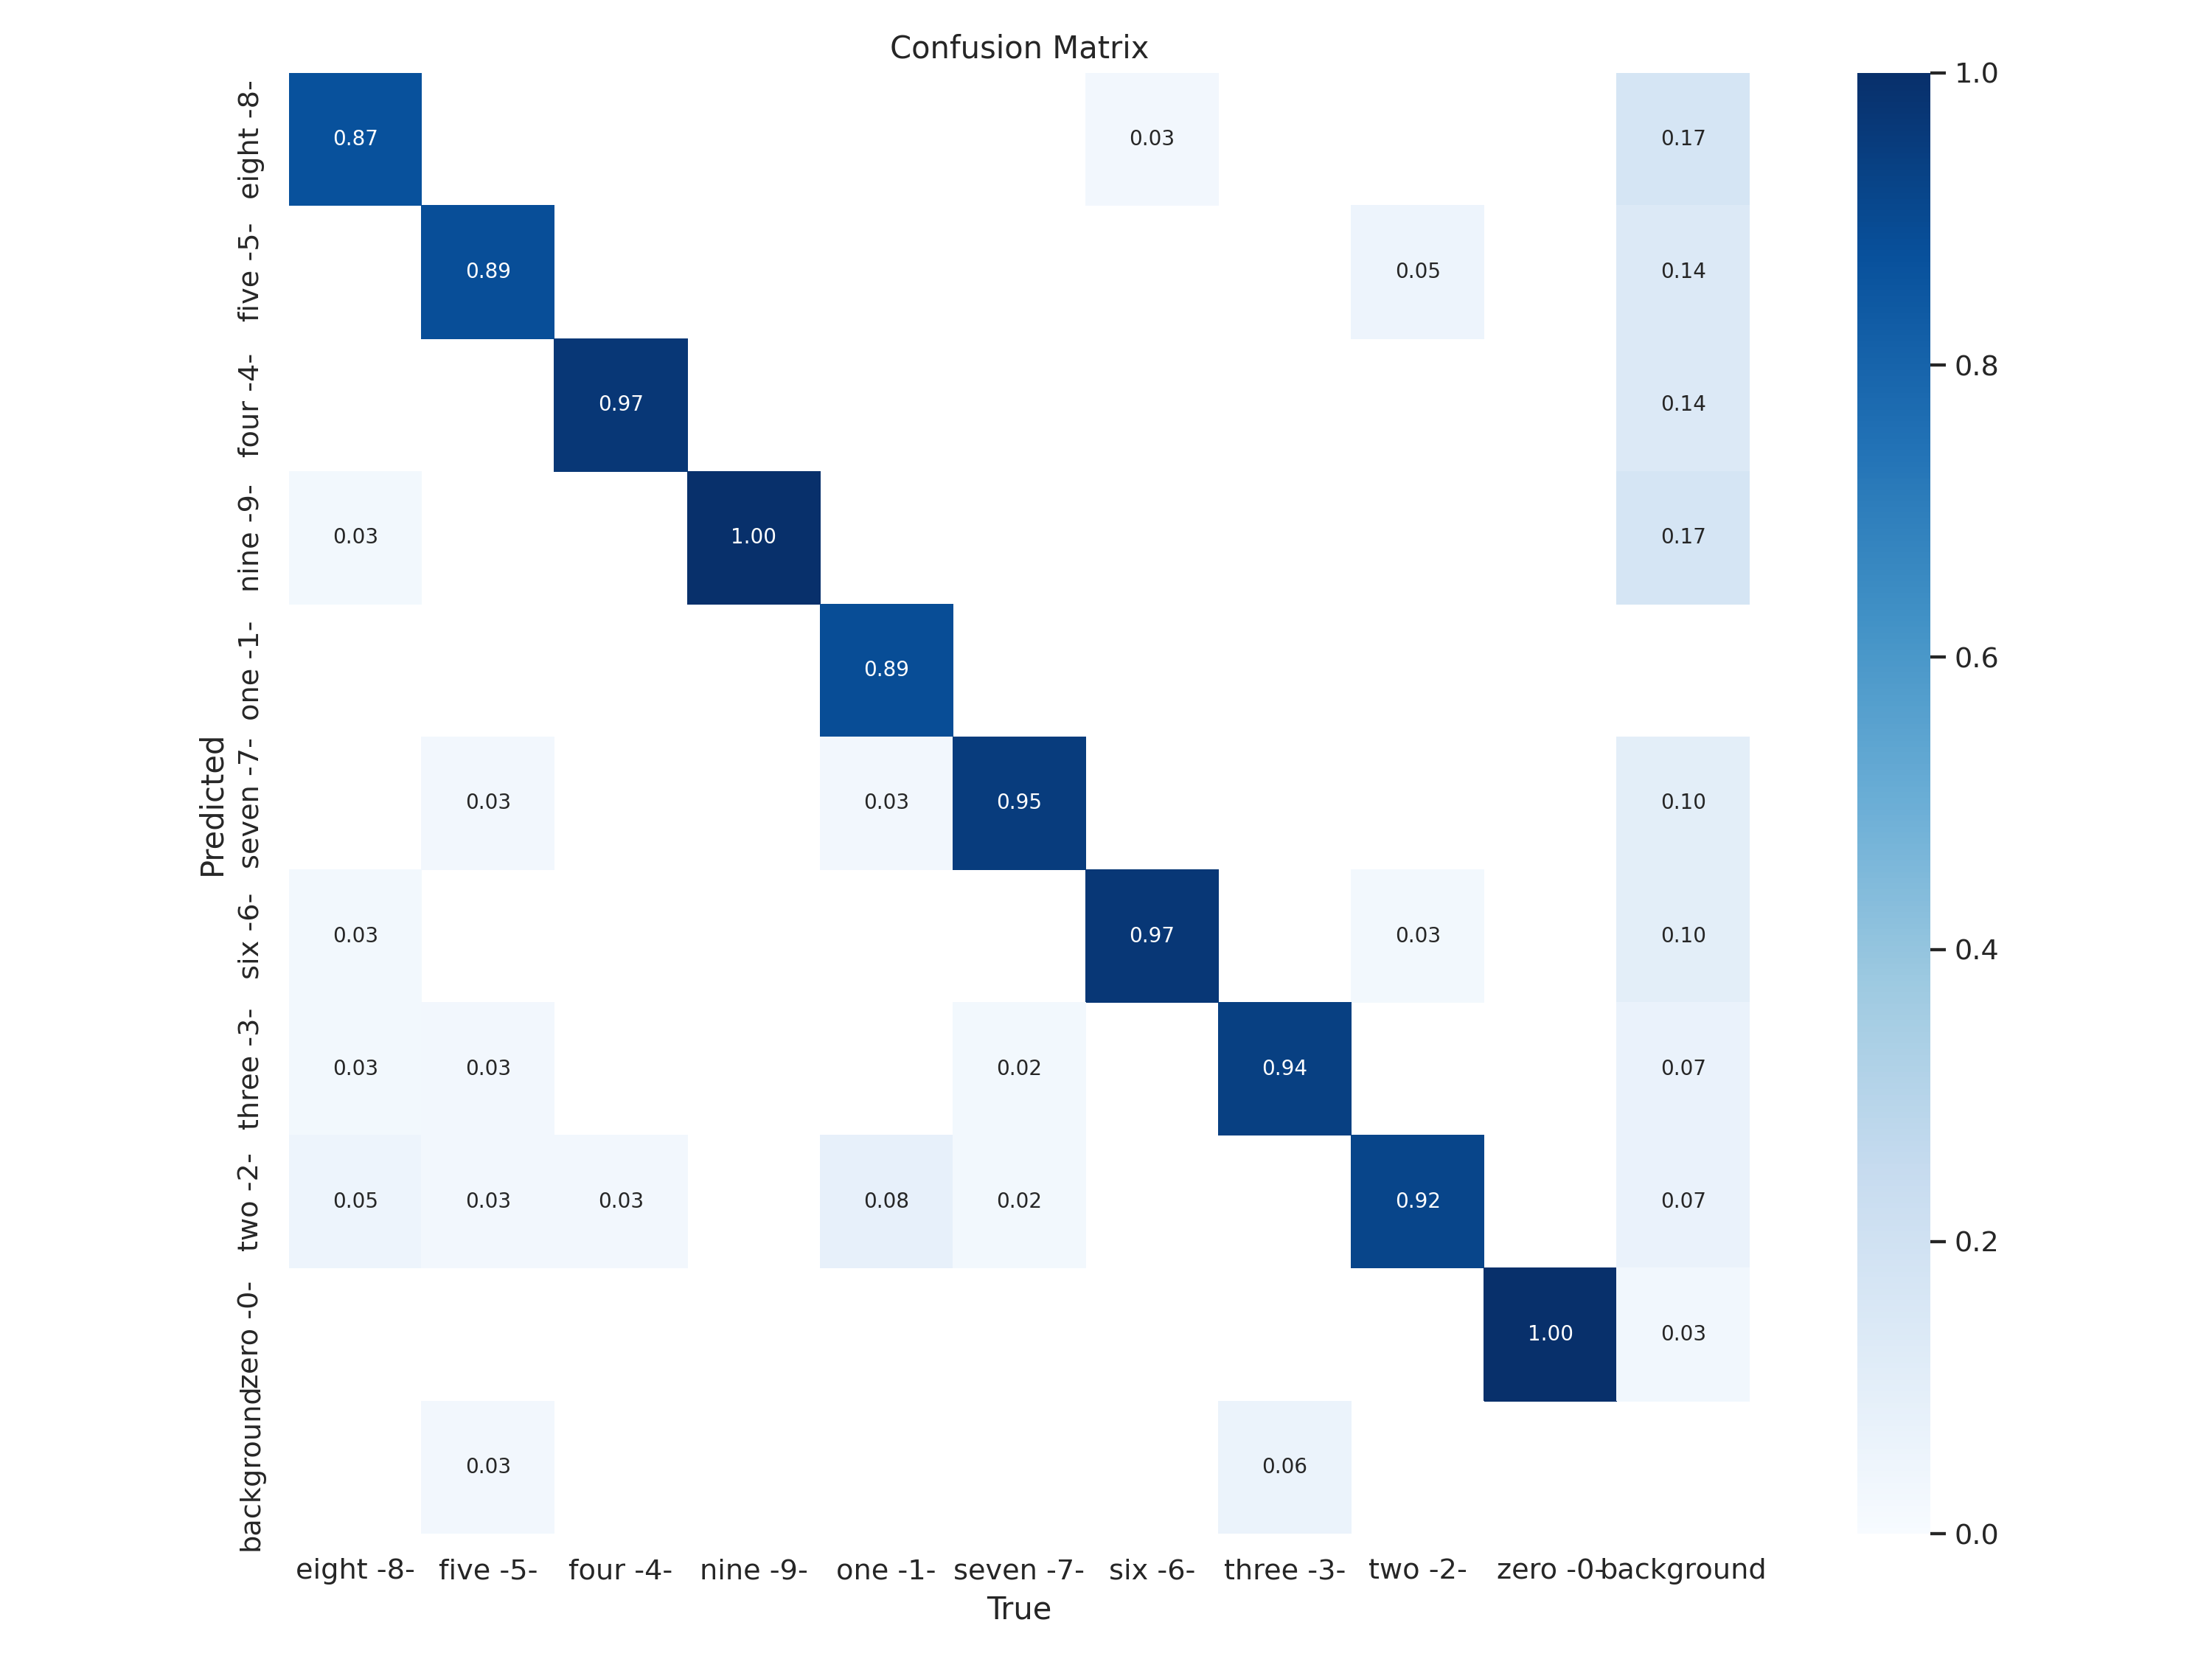

In [7]:
# shows the confusion matrix of the trained model
# for example for the class eight, it detected the digit correctly with 0.87.
# it also detected some of the eights as nine with 0.03, as six with 0.03, as three with 0.03, and as 2 with 0.05.
Image(filename='../../results/european/confusion_matrix.png')

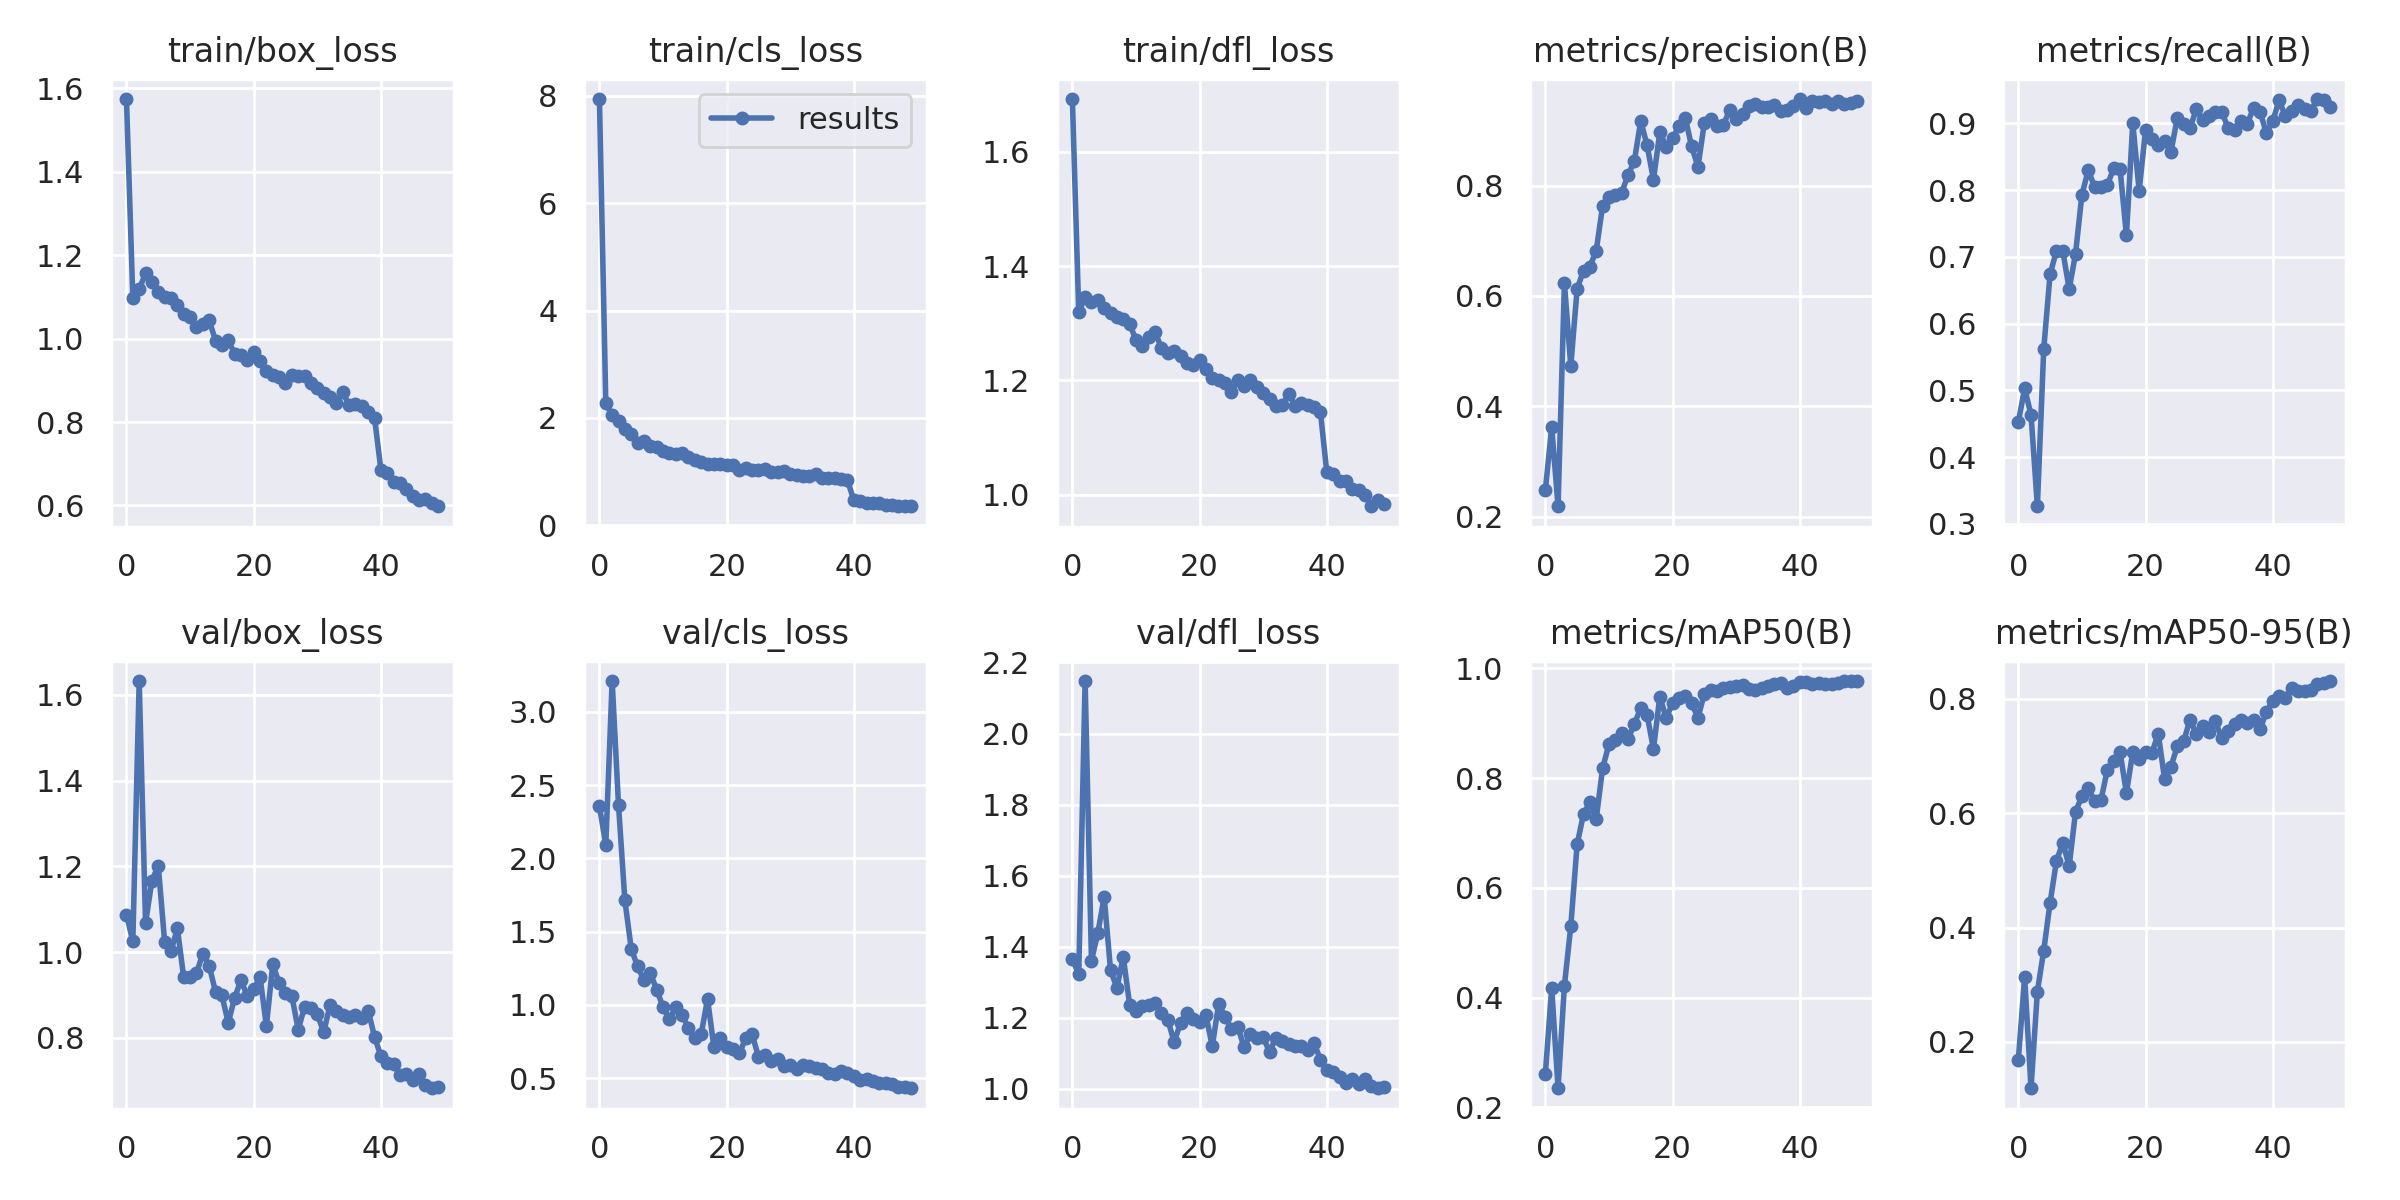

In [8]:
# shows the losses and metrics of the trained model
# losses are decreased in both training and validation data
# Precision measures how much of the bbox predictions are correct
# Recall measures how much of the true bbox were correctly predicted
# the last two tables are the mean Average Precision (mAP) at IoU (Intersection over Union) threshold of 0.5, and threshold between 0.5 and 0.95.
Image(filename = '../../results/european/results.png')

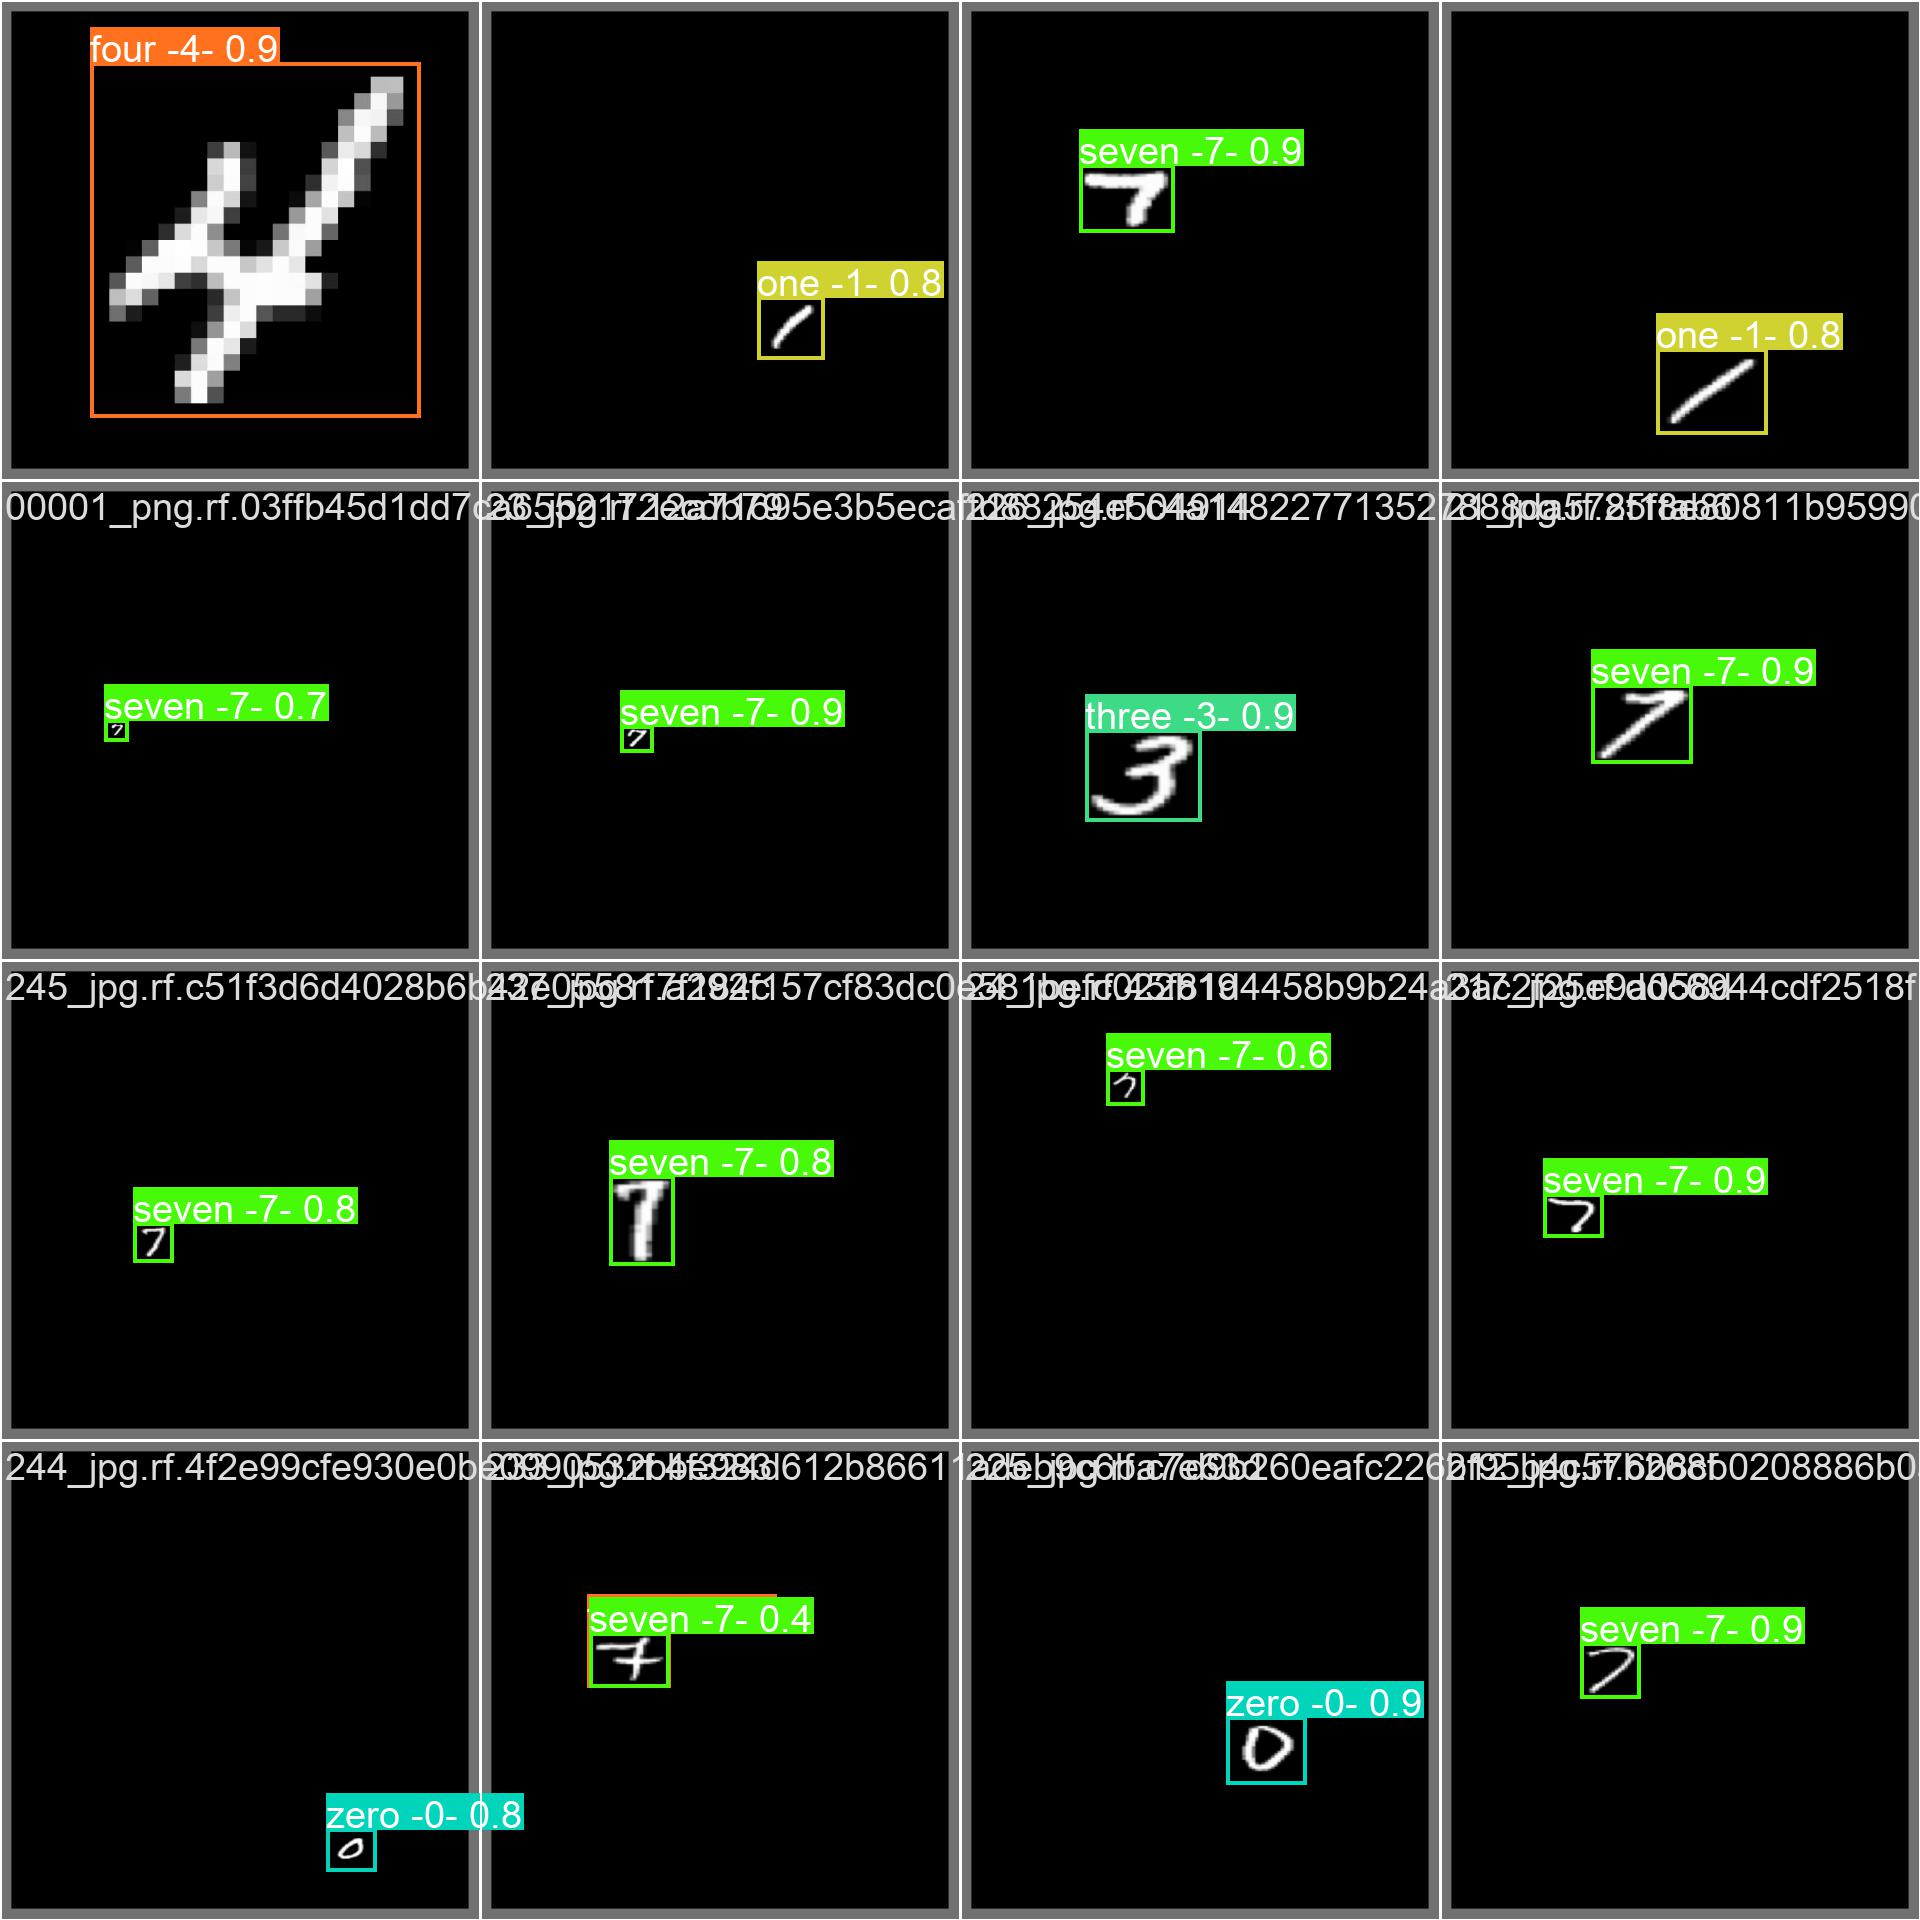

In [9]:
# The first batch, size of 16, images predictions
Image(filename='../../results/european/val_batch0_pred.jpg')

In [12]:
# tests the model on test images
!yolo task=detect mode=predict model=../../yolov8_weights/european/best.pt conf=0.25 source=../../yolov8_datasets/european_dataset/mnist-5/test/images save=True

Ultralytics YOLOv8.0.41 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00000_png.rf.f12593fa3b83b65f571eaf9b82185c22.jpg: 640x640 1 nine -9-, 451.0ms
image 2/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00001_png.rf.93c5bebc2f42a3ef6c21f96789fd6c4f.jpg: 640x640 1 five -5-, 320.4ms
image 3/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00001_png.rf.b75efc9b591c3ebead3e5e2892b96438.jpg: 640x640 1 three -3-, 303.3ms
image 4/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recogni

image 36/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00044_png.rf.97584d1b0a299b6abb6d33a75e6550d8.jpg: 640x640 1 eight -8-, 313.0ms
image 37/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00045_png.rf.4b6f49b96e467b31cf884574b0319e98.jpg: 640x640 1 eight -8-, 304.5ms
image 38/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00045_png.rf.bcbacafc30221c46b9939c5cc3d870a3.jpg: 640x640 1 four -4-, 1 six -6-, 313.5ms
image 39/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00047_png.rf.3b948c977e7f67f99d0b538eed003da7.jpg: 640x640 1 one -1-, 304.1ms
image 40/184 /Users/zeynepnuraksay/Desktop/final_year_project/zn

image 72/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00070_png.rf.e7d365ea5bd701a49189f57930396fe0.jpg: 640x640 1 three -3-, 310.5ms
image 73/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00071_png.rf.ae7f7b4a4f5617c1002f7e9b025ea3a7.jpg: 640x640 1 eight -8-, 308.4ms
image 74/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00072_png.rf.ad1c32951a7c055972c51eaac9bcf398.jpg: 640x640 1 five -5-, 327.0ms
image 75/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/00073_png.rf.62026e17bceb21e70fe2cbb2049dbf50.jpg: 640x640 1 seven -7-, 307.9ms
image 76/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_w

image 108/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/255_jpg.rf.514bac7a337a927458ded426d881a1b4.jpg: 640x640 1 seven -7-, 318.8ms
image 109/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/256_jpg.rf.32f039da11d0aeb82daf1dc51e9f3183.jpg: 640x640 1 seven -7-, 322.7ms
image 110/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/25_jpg.rf.d01c825b17d17f85270a60096ca220dd.jpg: 640x640 1 four -4-, 326.1ms
image 111/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/26_jpg.rf.aaf657737edc709747270f9f01d19cfe.jpg: 640x640 1 zero -0-, 327.0ms
image 112/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written

image 144/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/404_jpg.rf.978d0d04664c1b2def07cde4c2415671.jpg: 640x640 1 five -5-, 343.9ms
image 145/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/40_jpg.rf.203b20c774e0c98413e899d3bc306c05.jpg: 640x640 1 nine -9-, 338.7ms
image 146/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/42_jpg.rf.e5e0f15610b6e413ddeba5dc87ec5e8e.jpg: 640x640 1 three -3-, 348.0ms
image 147/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/432_jpg.rf.e554ab891c1c9241139768b12d46fea3.jpg: 640x640 1 five -5-, 326.9ms
image 148/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_

image 180/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/86_jpg.rf.26de564eff23a695c1b5137be22ca56d.jpg: 640x640 1 nine -9-, 336.3ms
image 181/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/88_jpg.rf.f9dcca628f50a9398b2a7d5954929aad.jpg: 640x640 1 zero -0-, 344.9ms
image 182/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/92_jpg.rf.732c41d1ba09ec08e34d78f04046d3c3.jpg: 640x640 1 two -2-, 337.1ms
image 183/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/yolov8_datasets/european_dataset/mnist-5/test/images/93_jpg.rf.712fdd7fc6c4c988ab2d47a849401883.jpg: 640x640 1 eight -8-, 331.6ms
image 184/184 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_dig

/var/folders/yt/2hzk91fs5h750f2m0xbf7hfm0000gn/T/ipykernel_85489/570527345.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


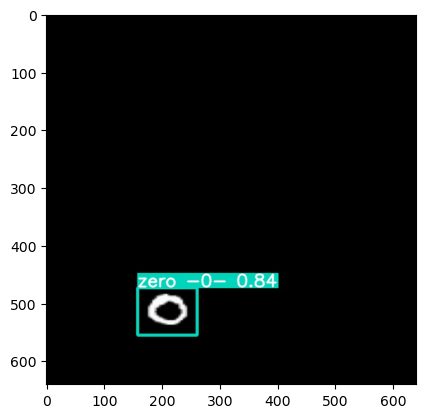

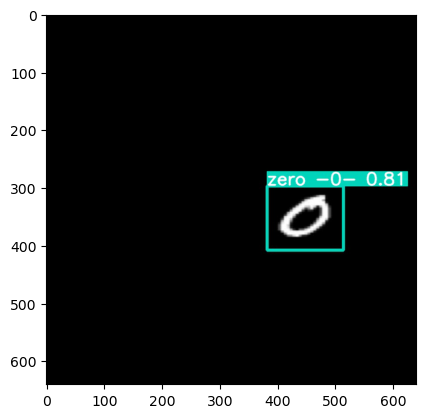

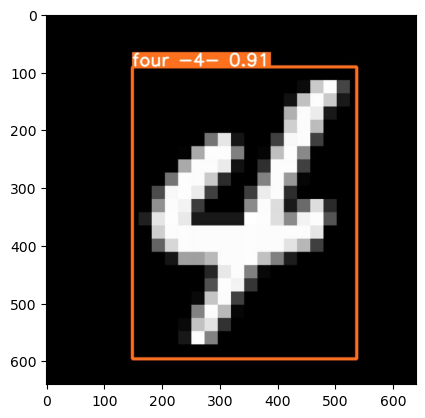

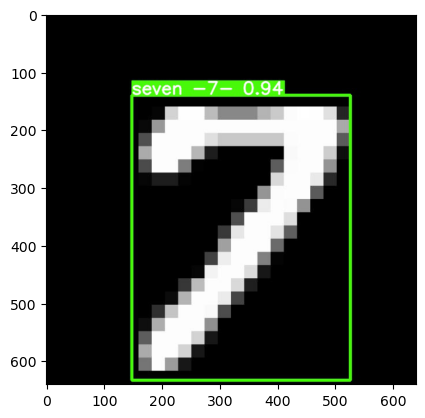

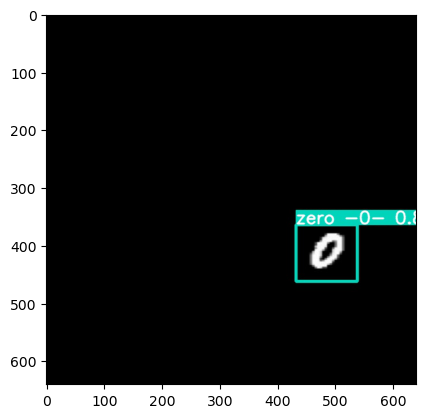

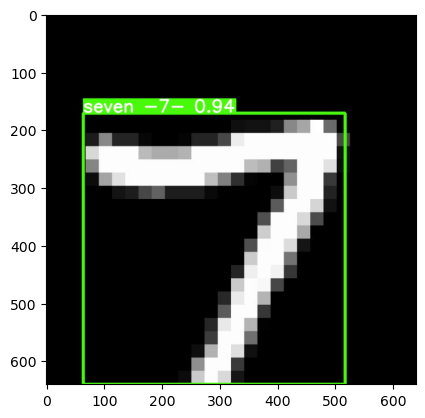

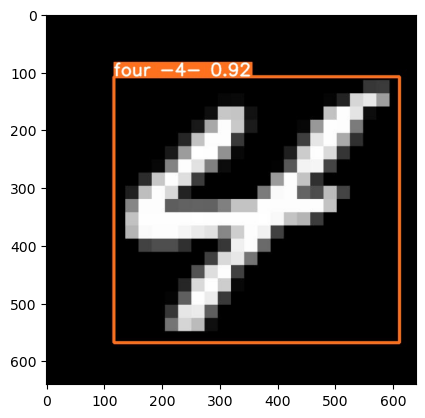

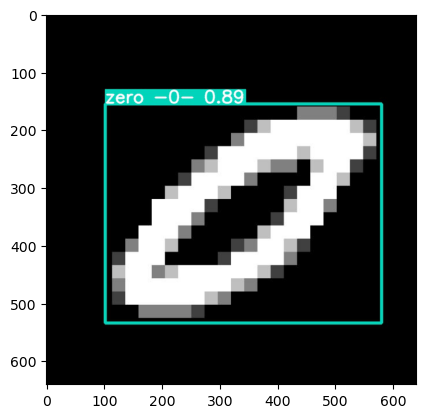

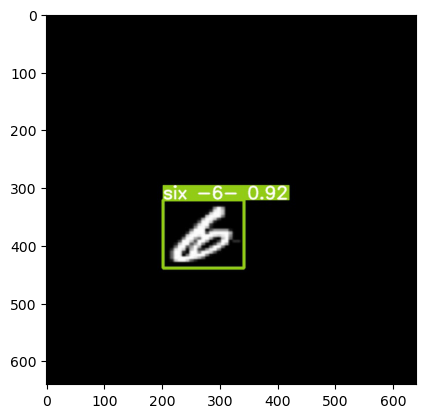

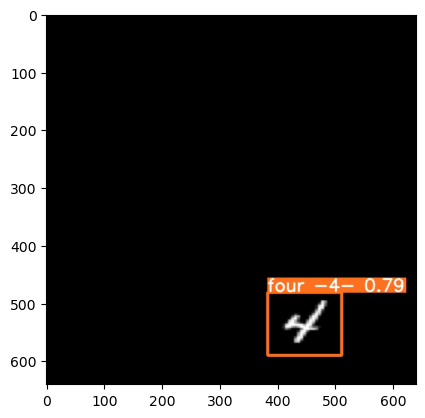

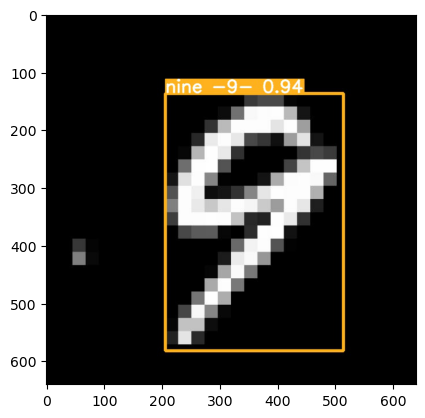

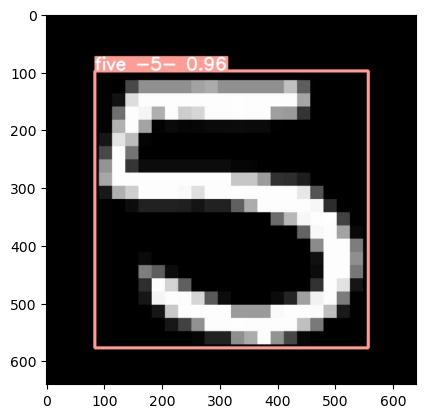

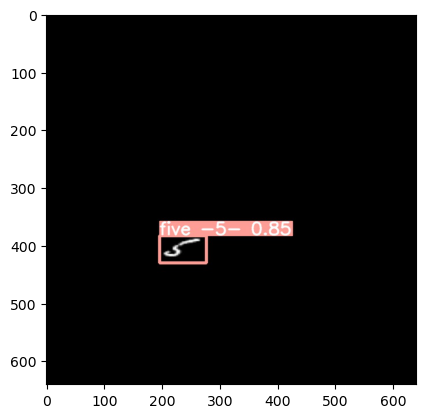

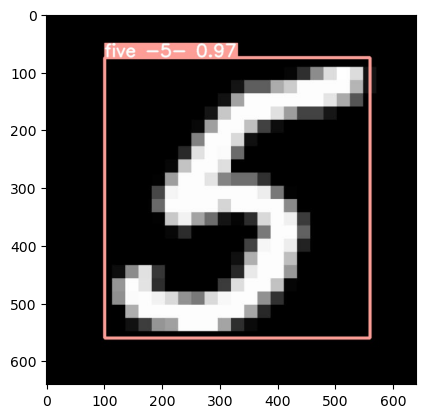

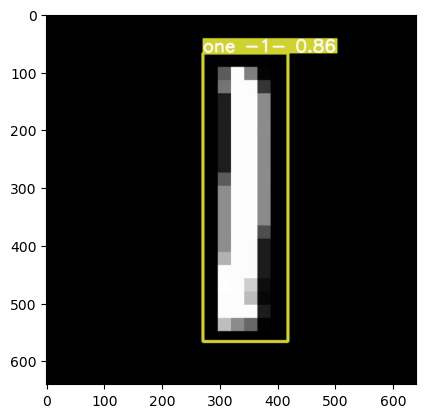

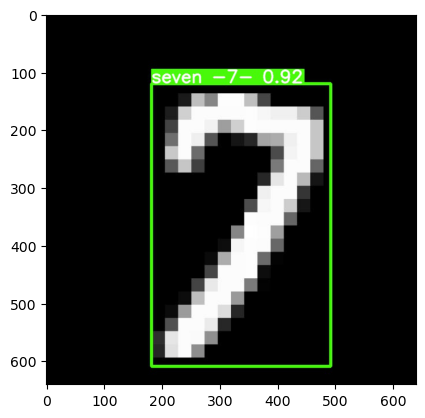

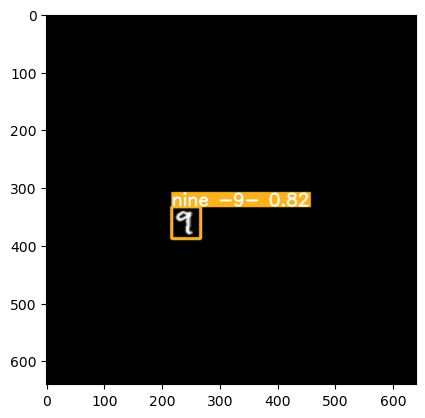

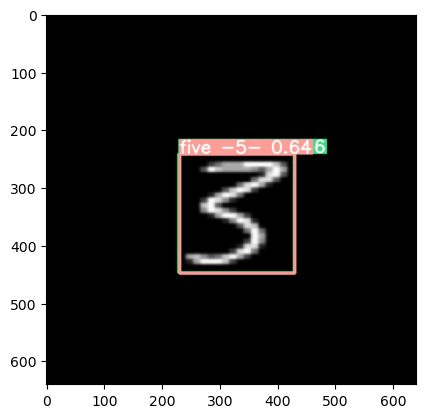

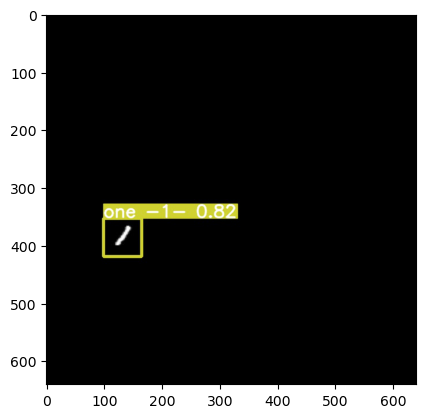

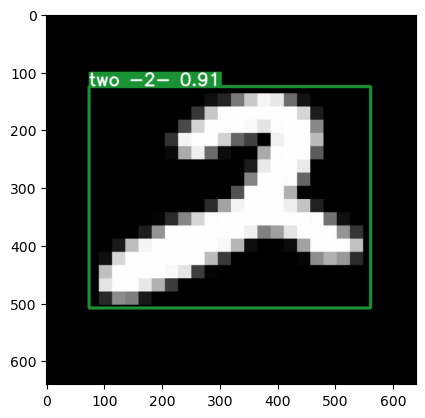

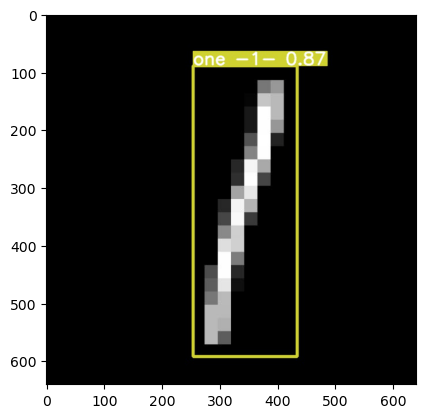

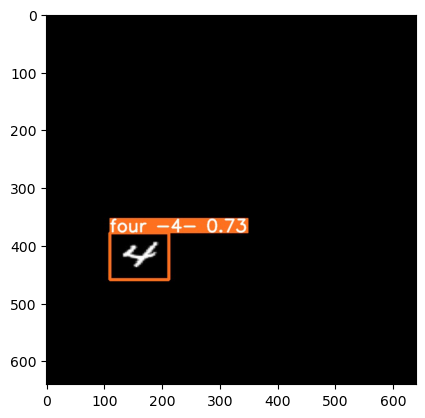

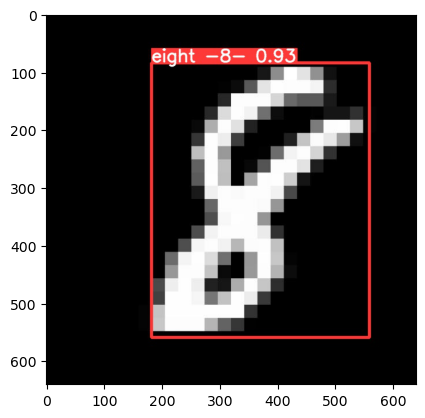

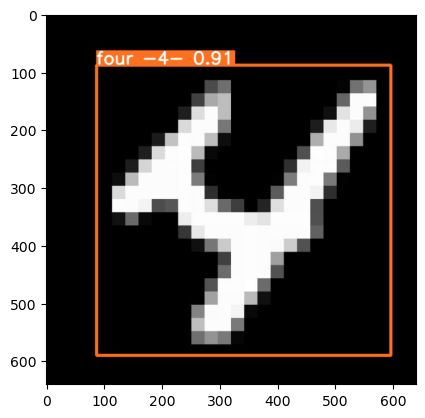

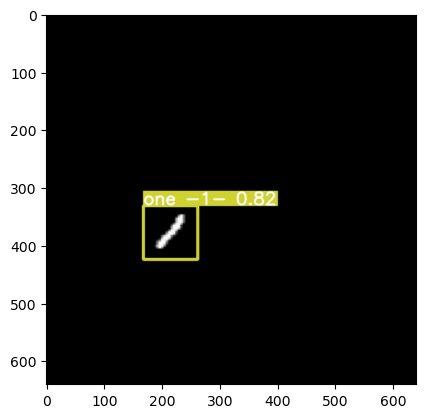

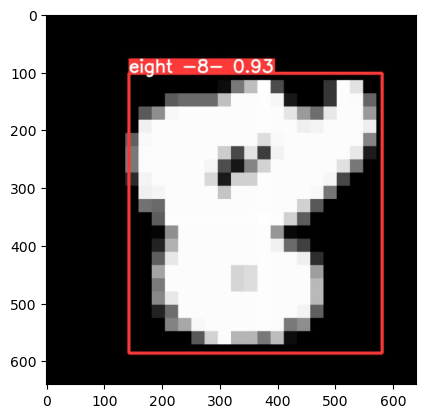

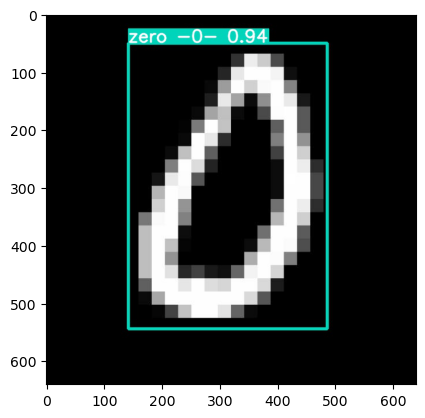

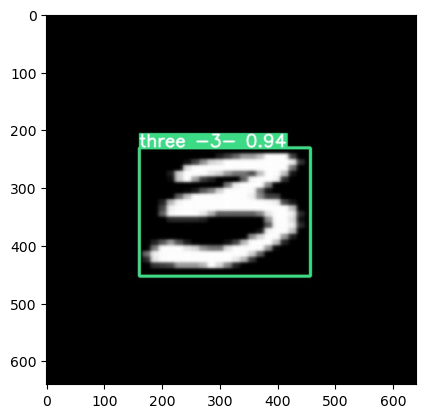

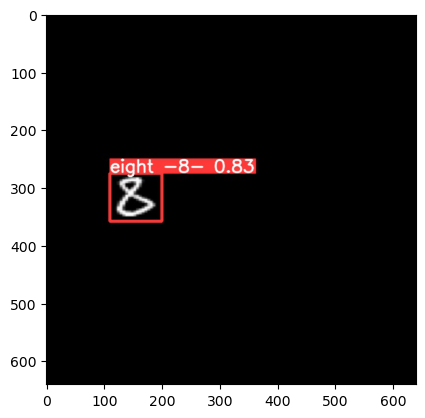

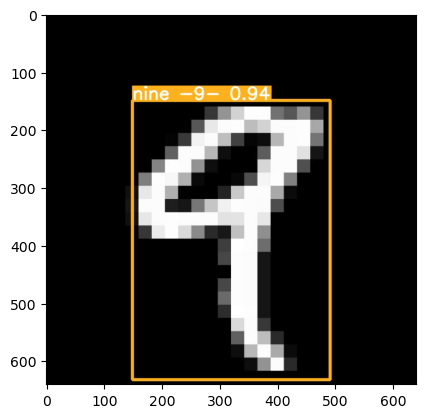

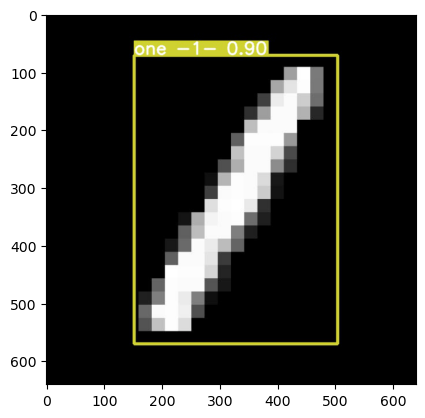

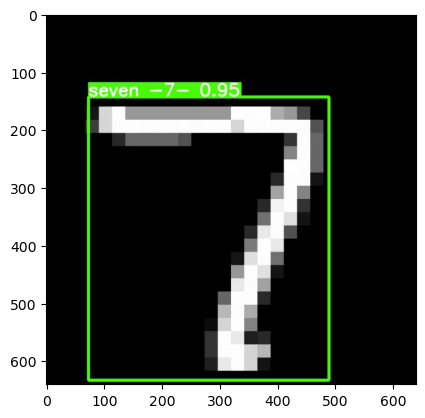

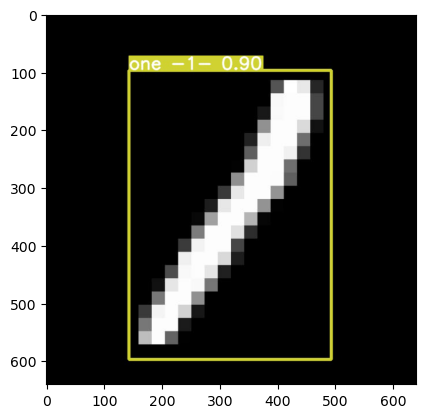

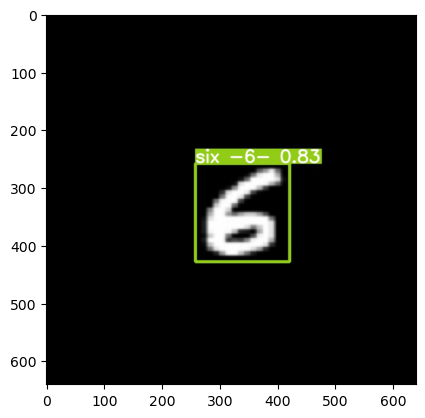

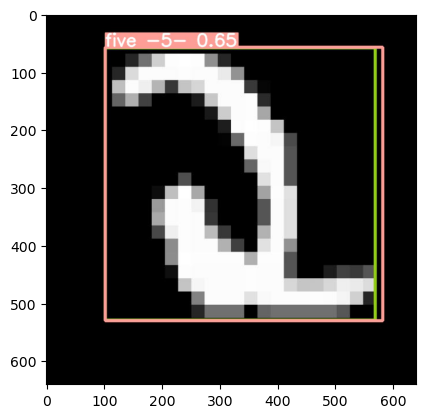

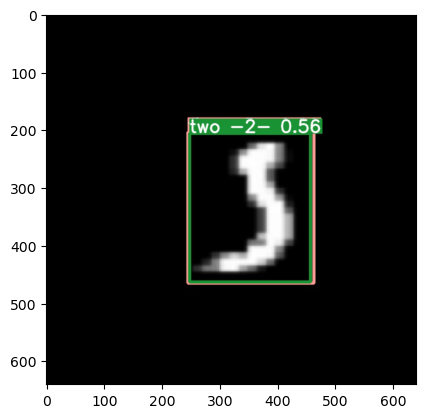

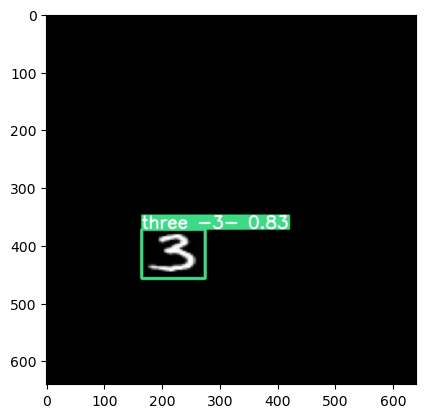

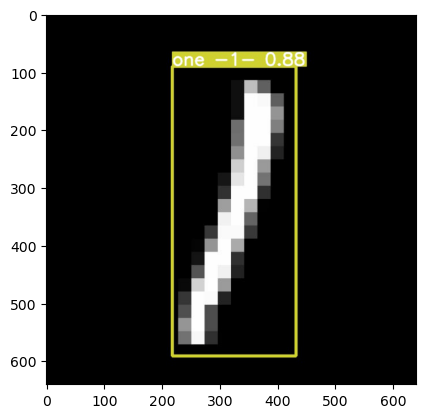

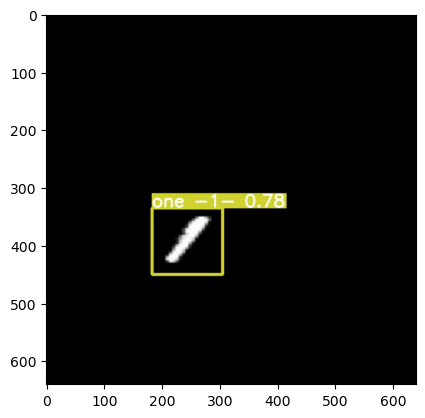

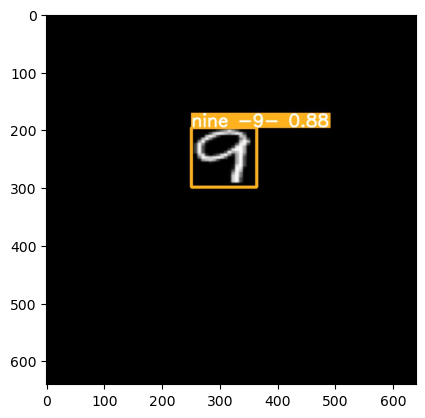

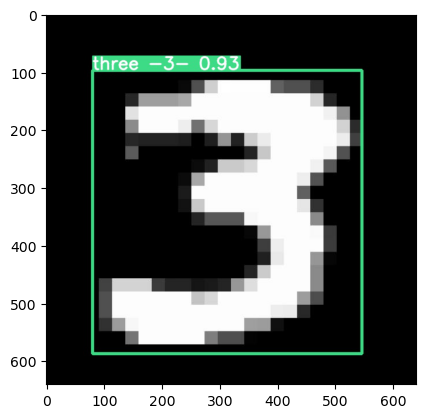

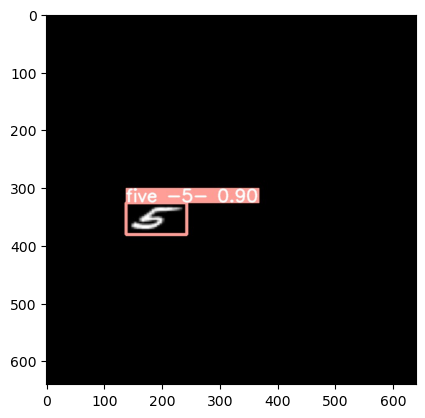

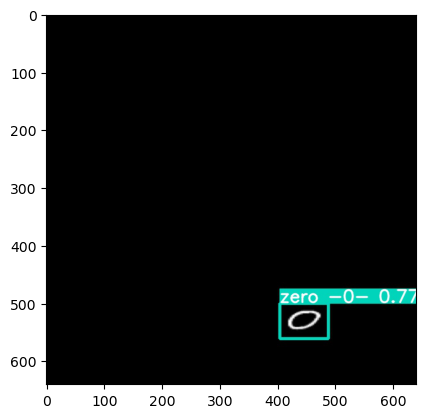

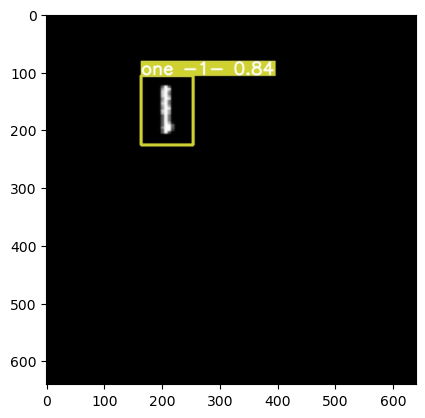

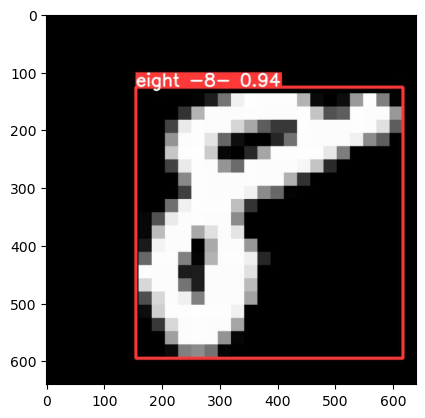

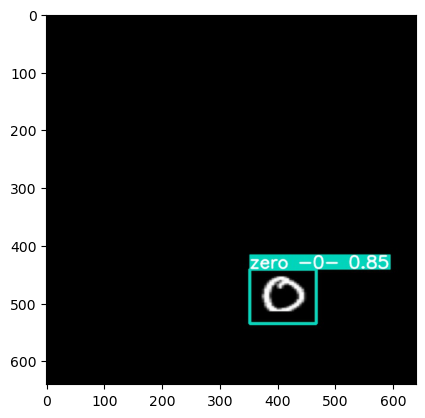

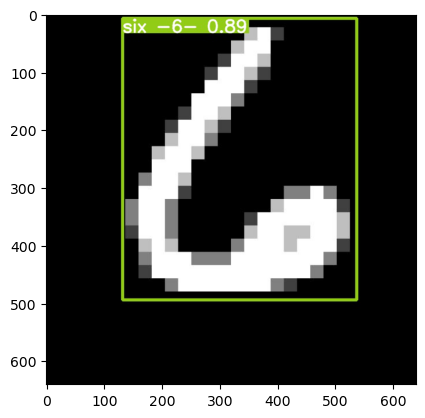

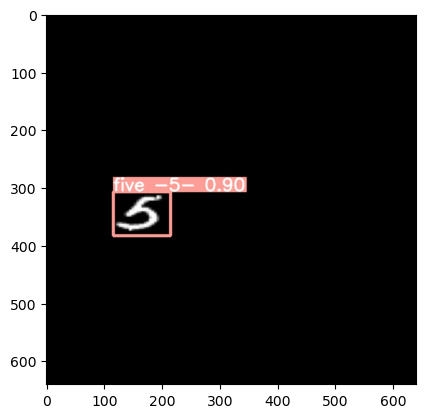

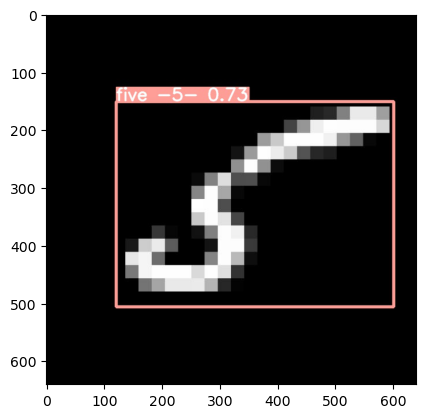

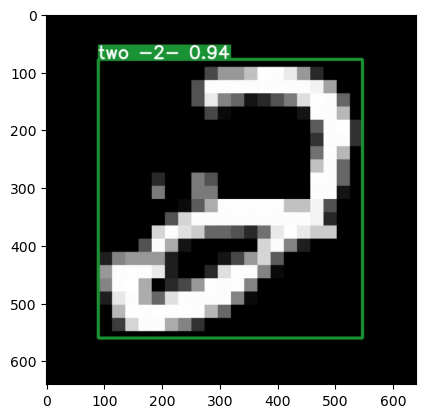

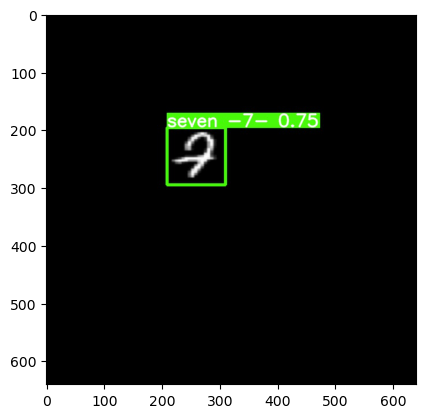

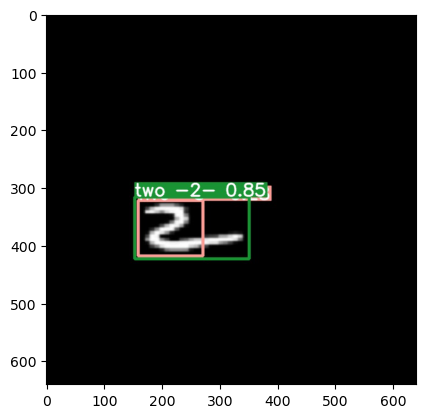

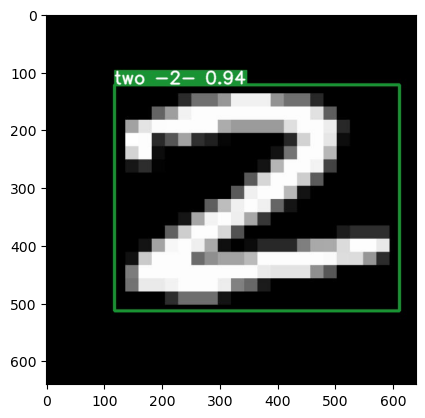

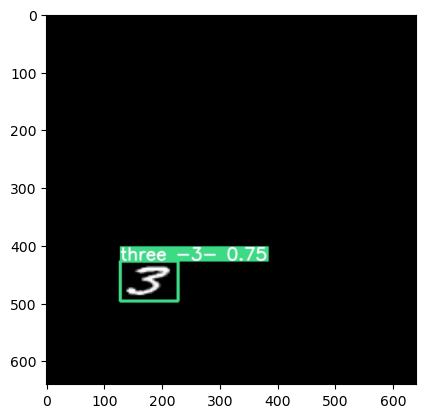

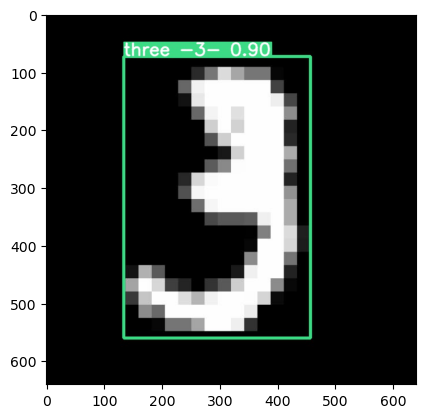

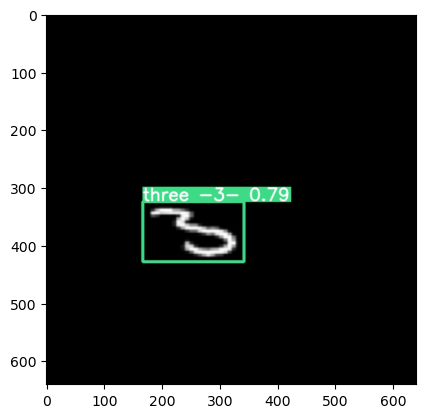

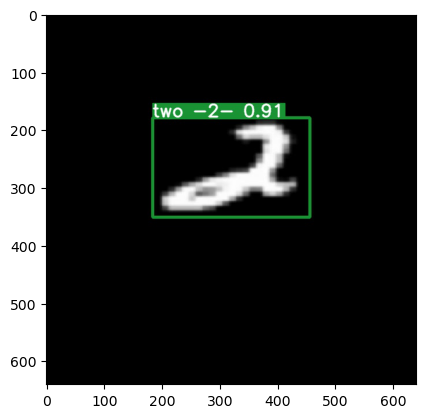

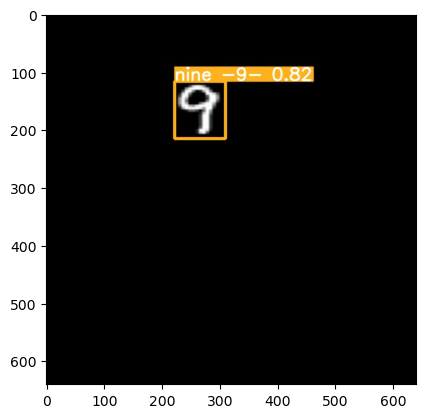

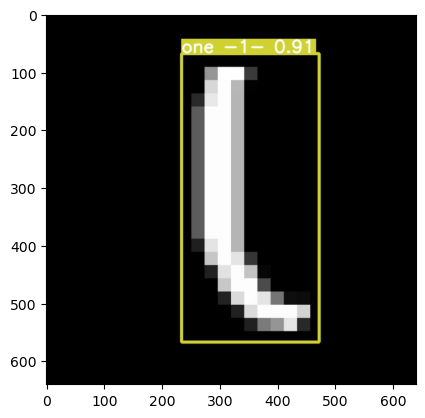

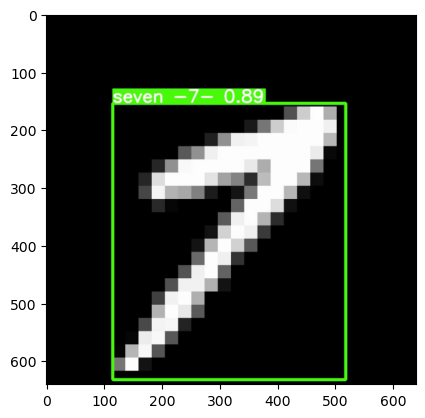

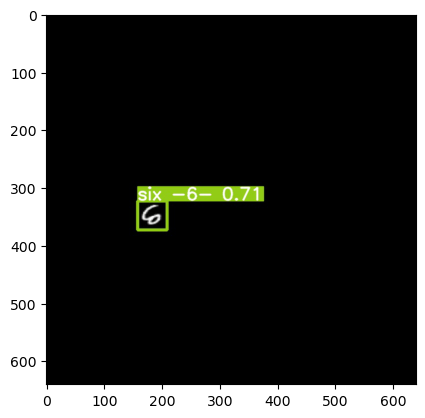

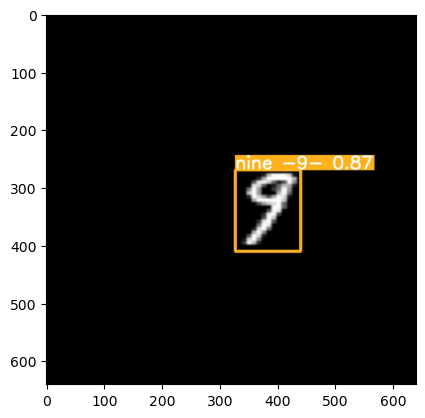

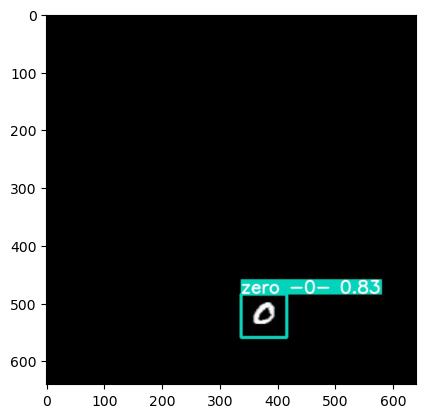

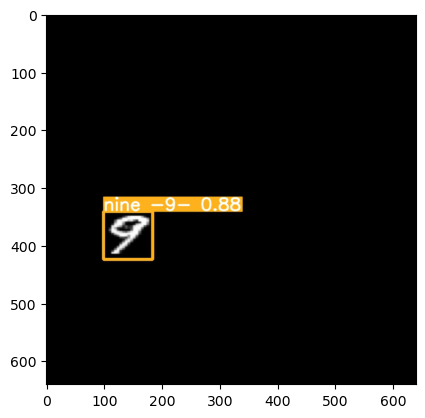

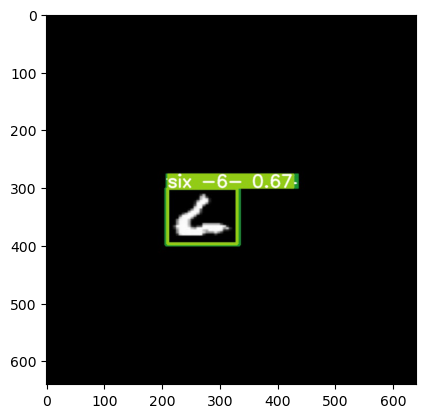

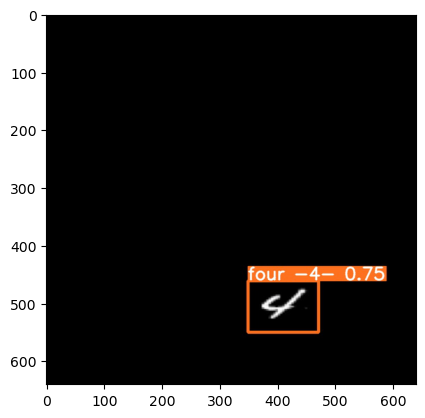

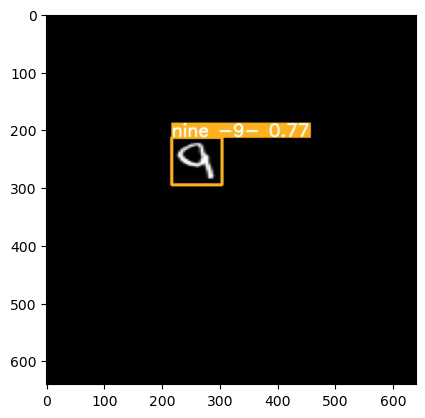

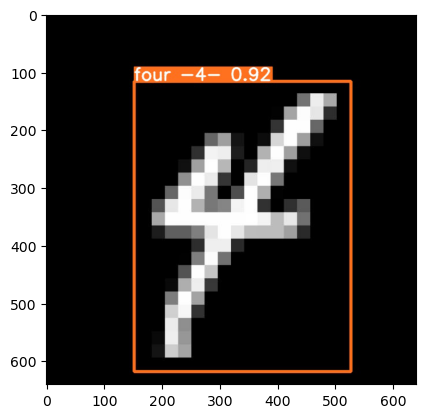

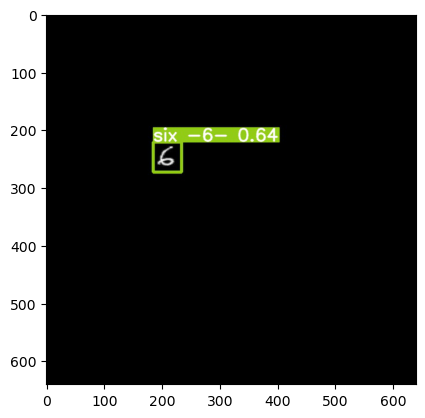

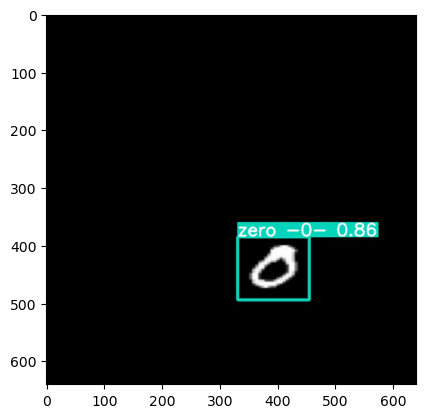

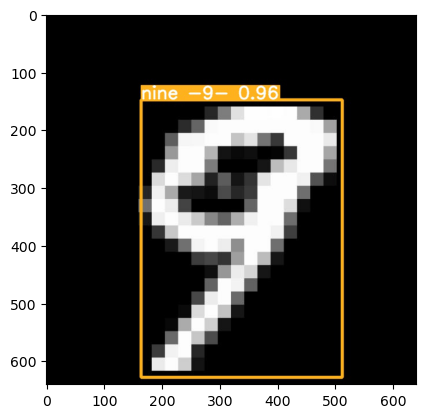

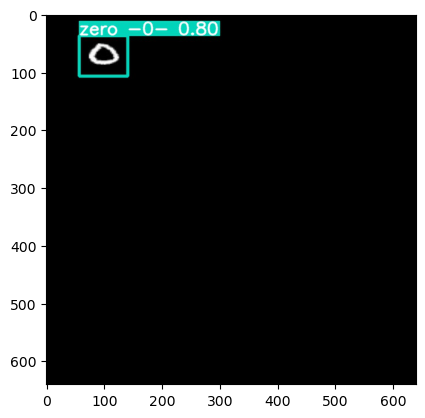

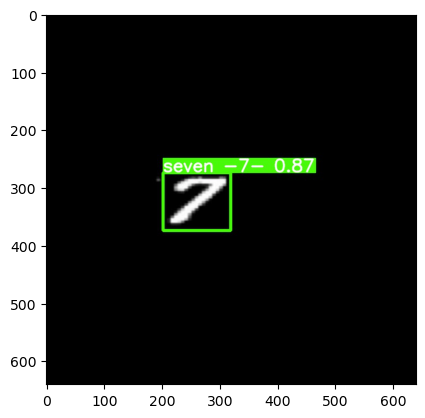

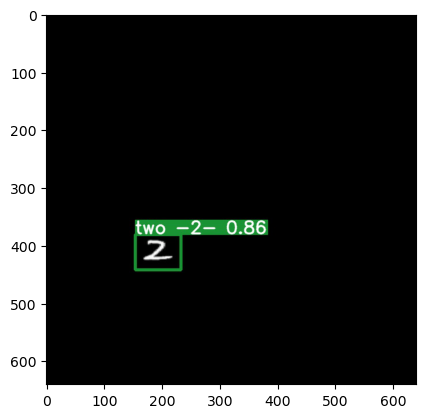

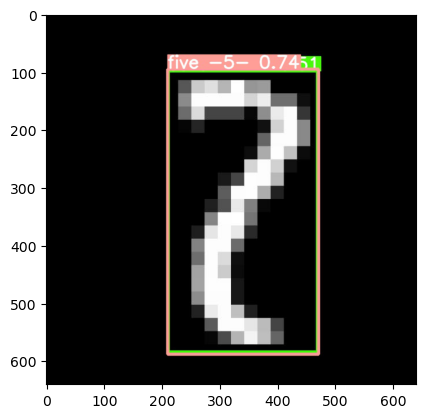

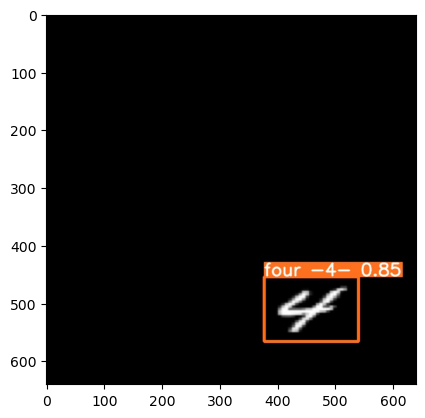

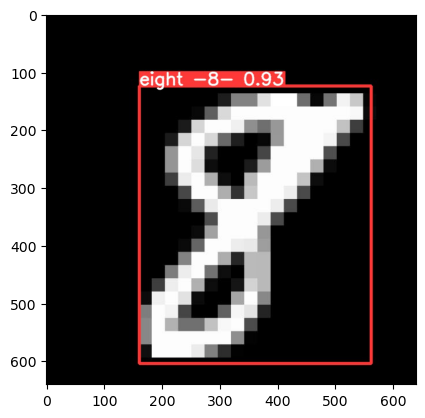

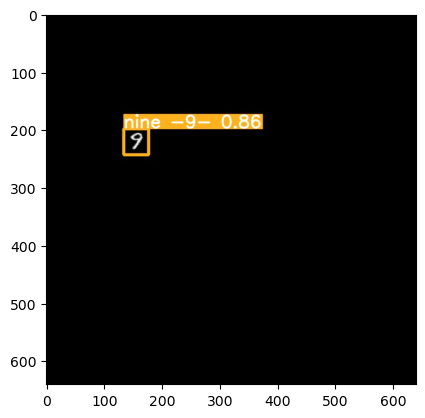

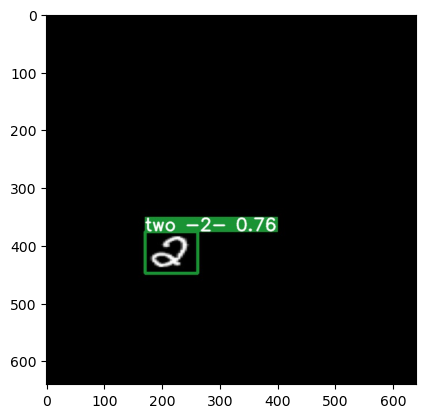

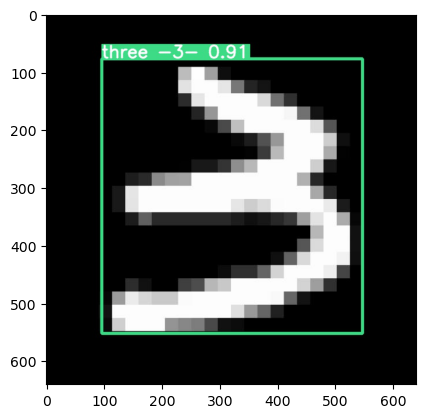

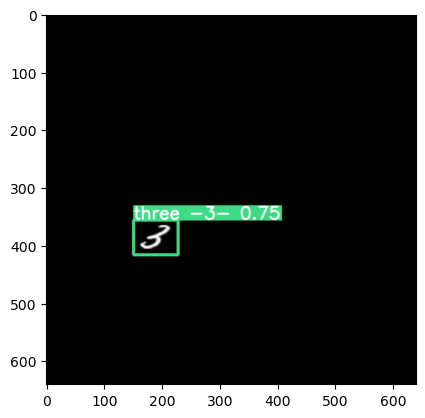

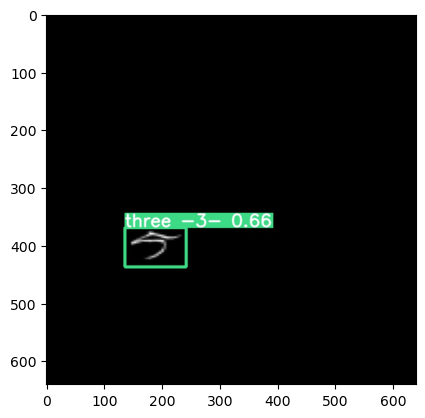

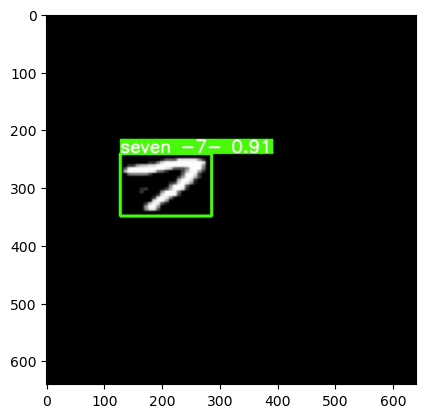

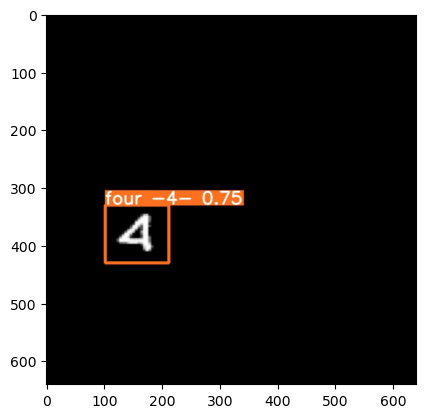

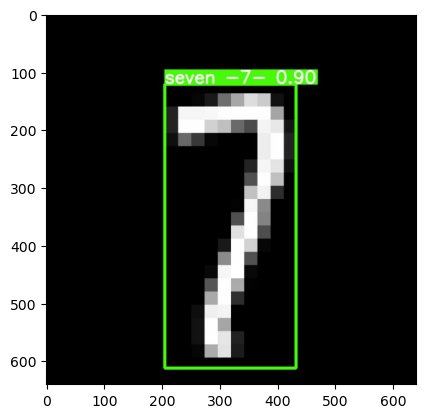

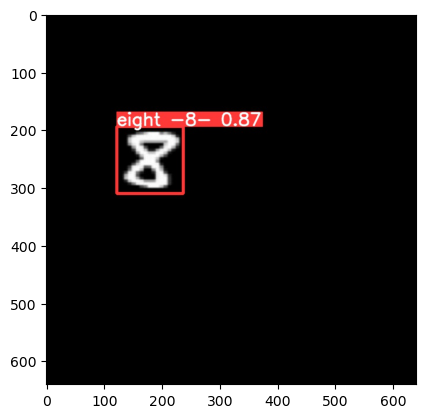

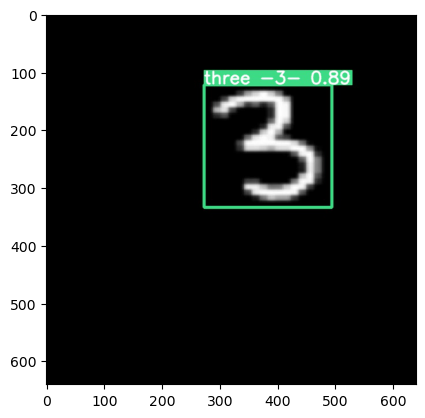

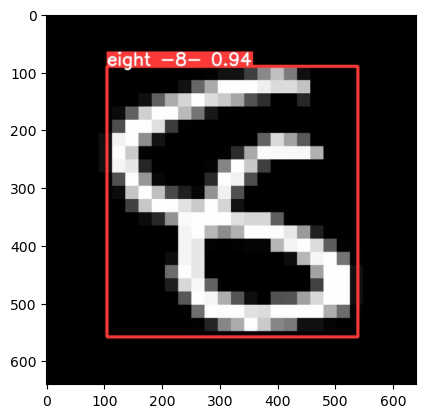

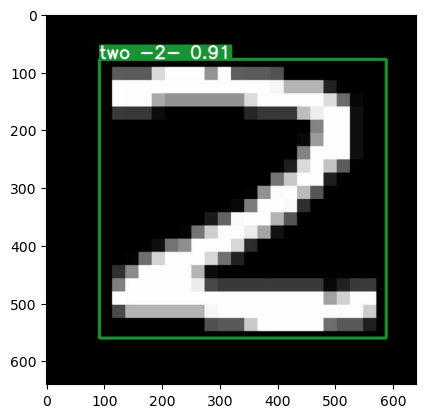

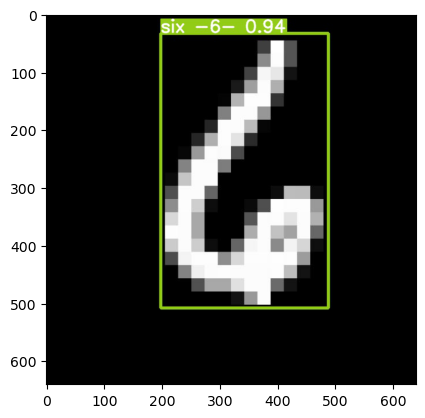

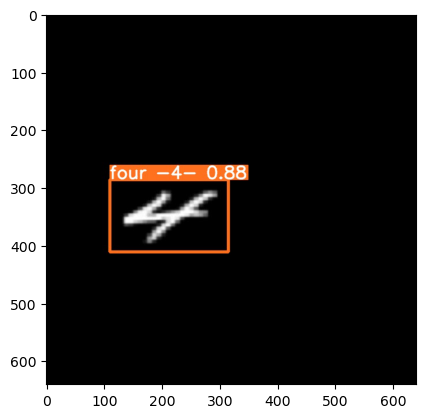

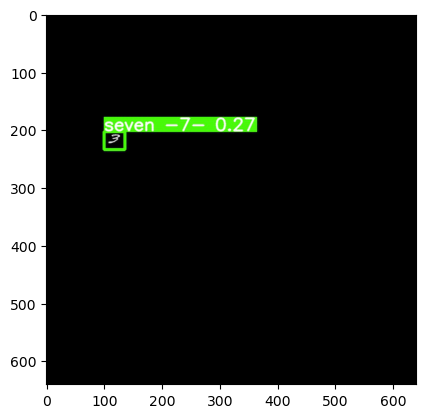

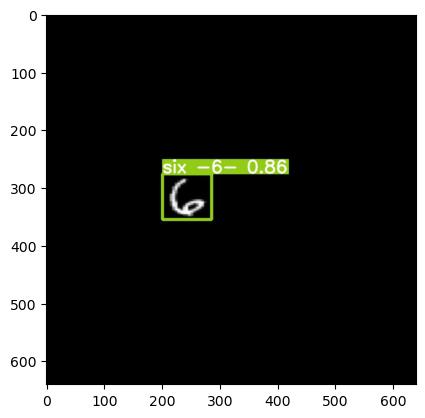

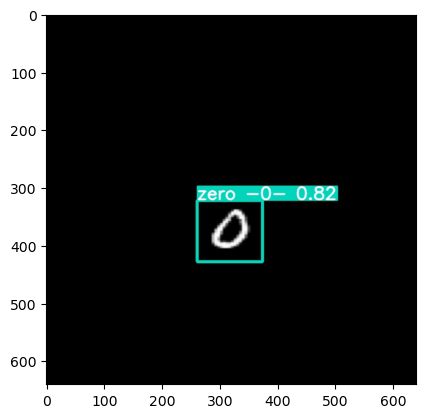

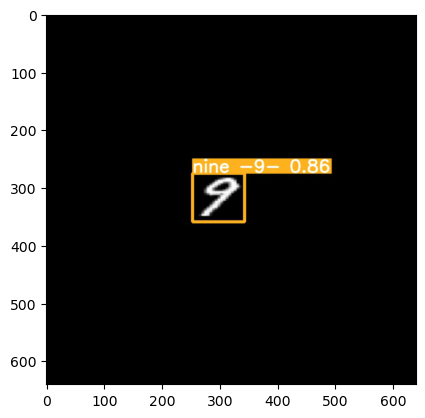

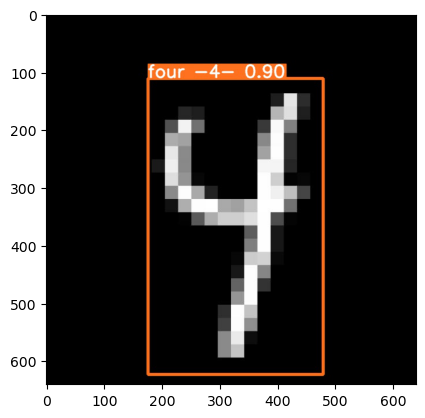

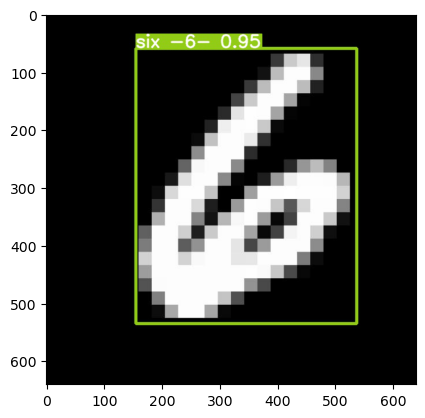

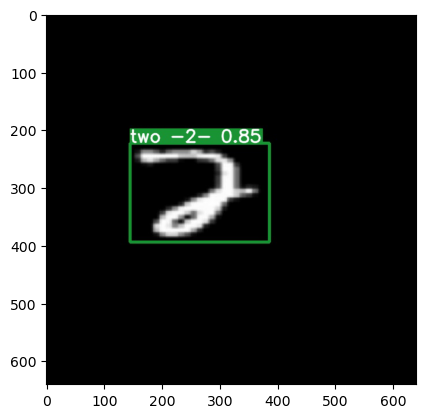

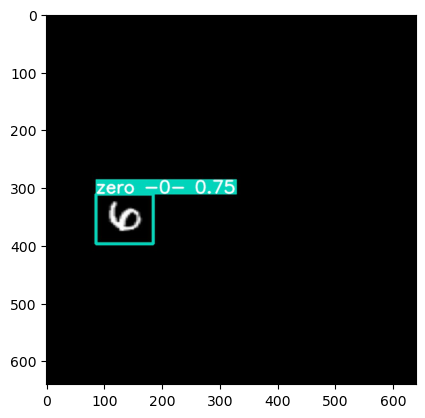

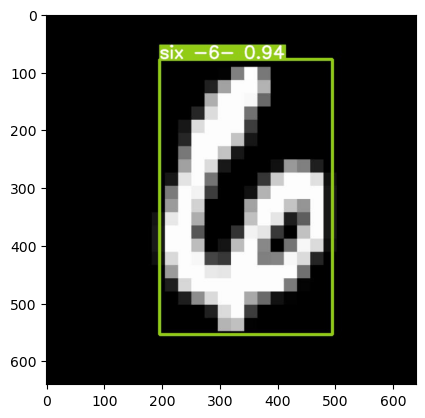

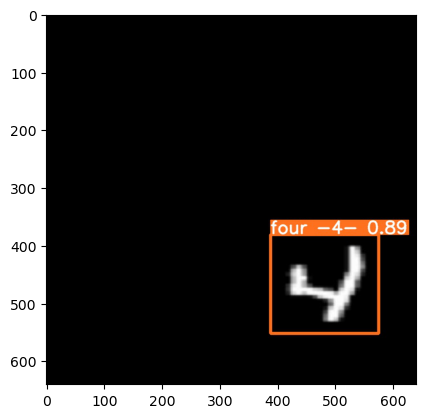

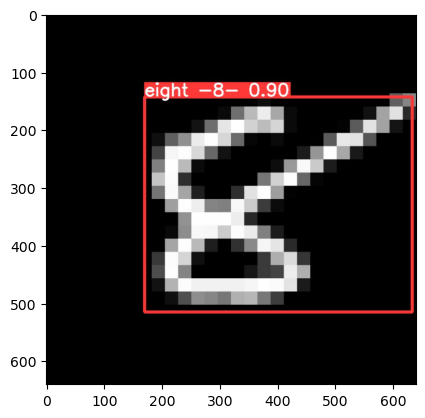

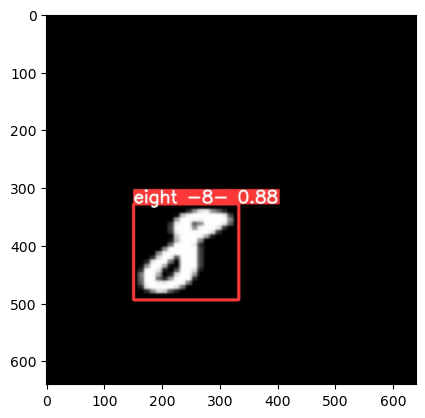

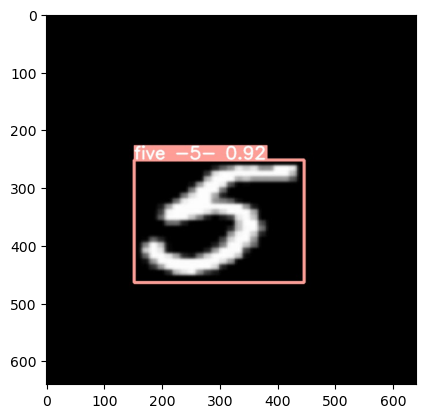

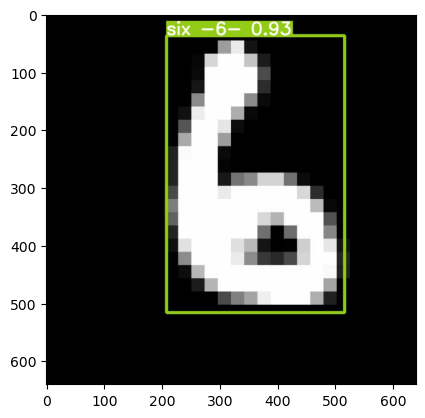

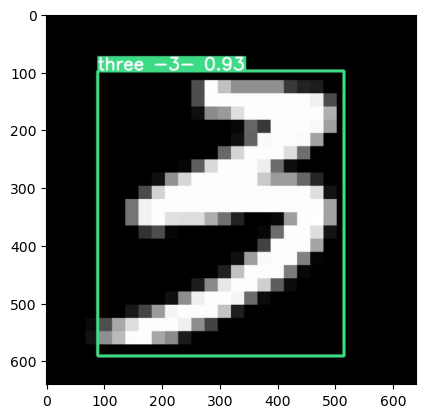

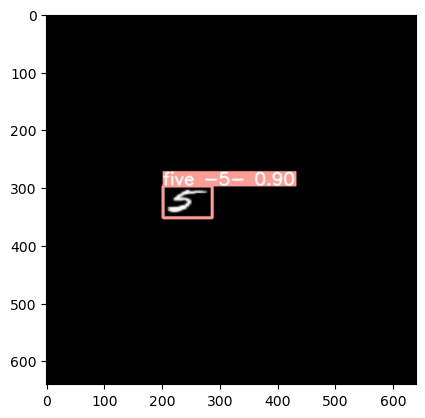

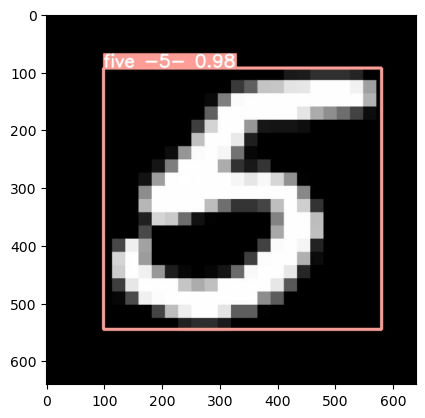

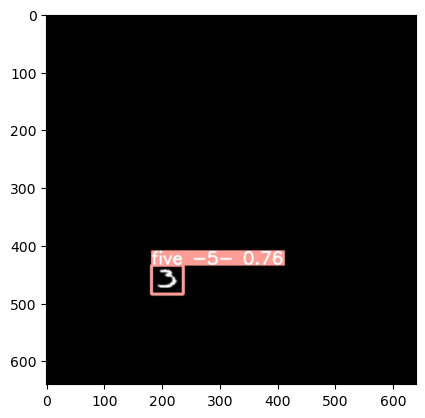

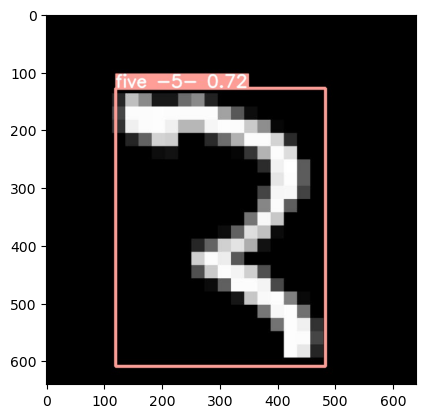

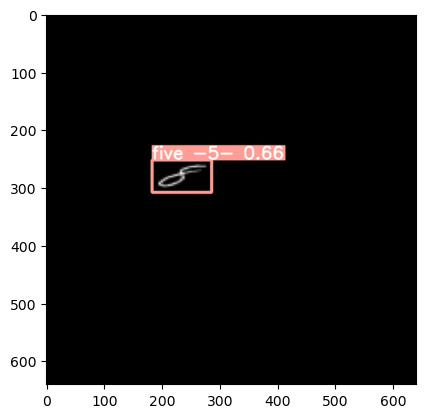

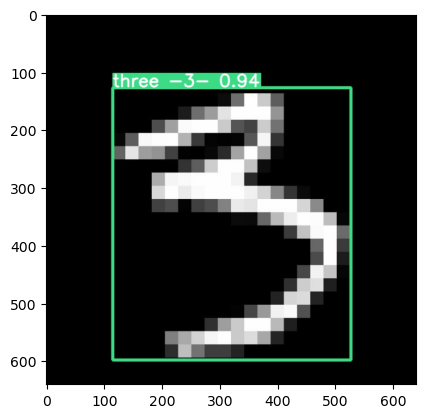

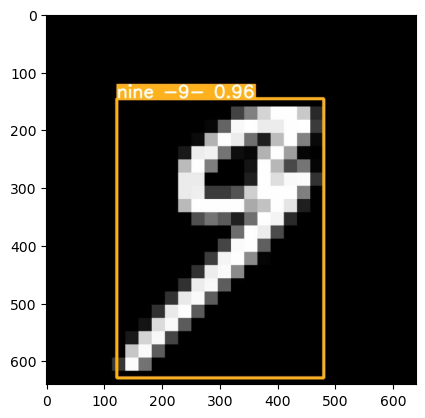

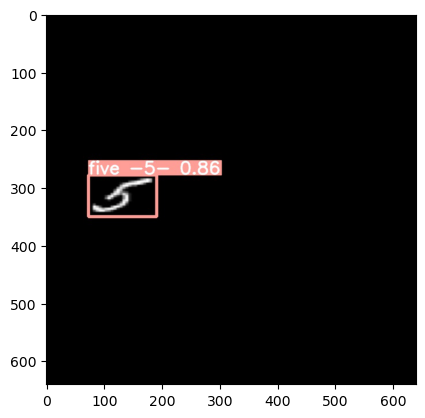

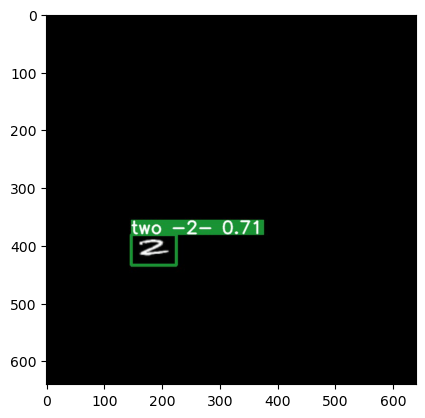

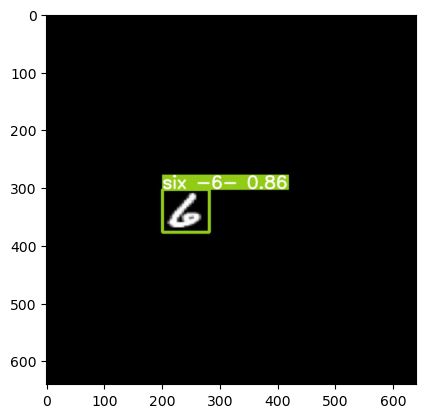

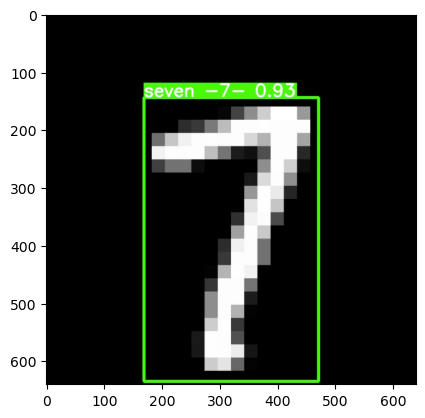

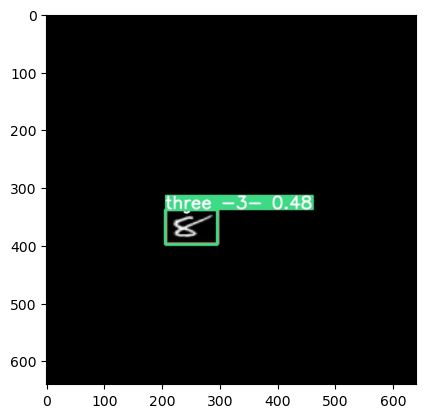

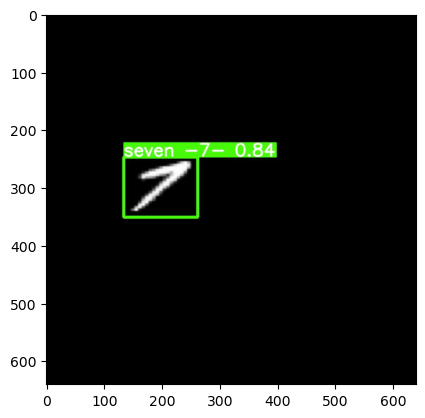

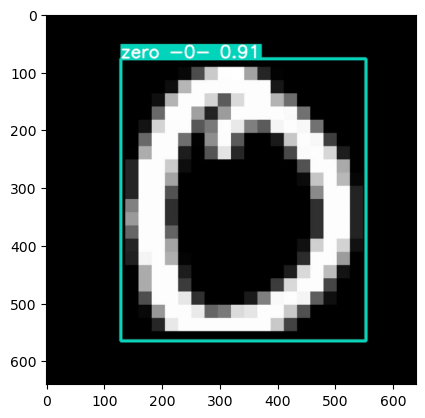

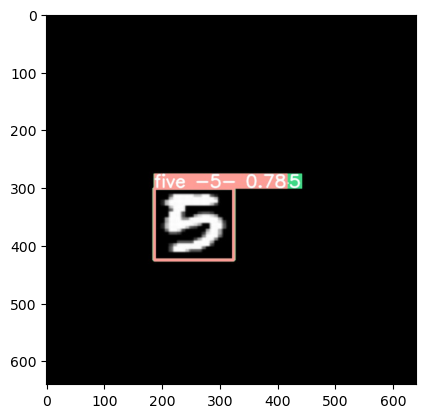

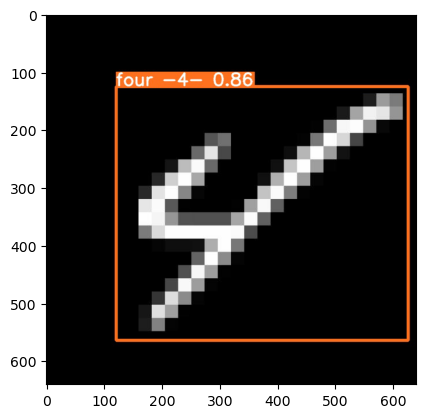

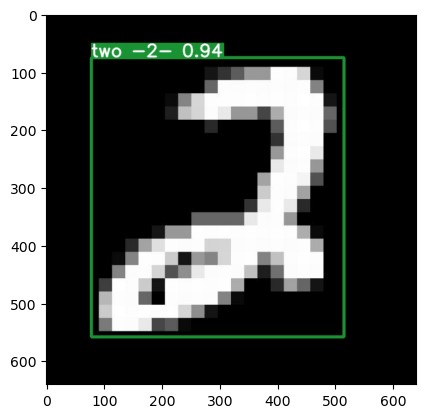

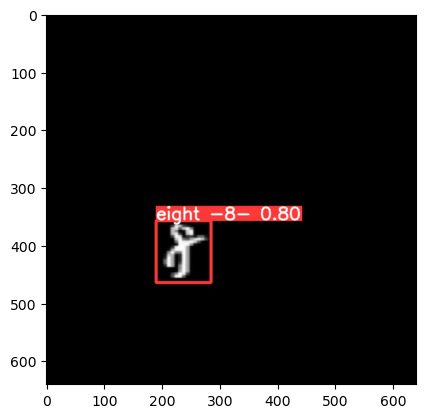

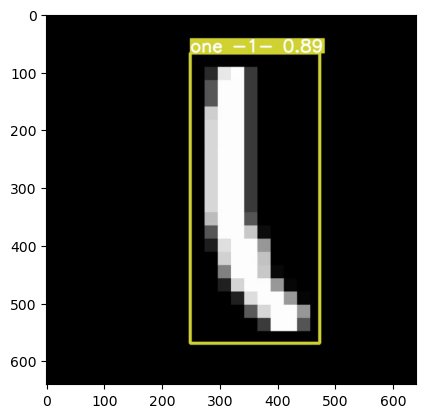

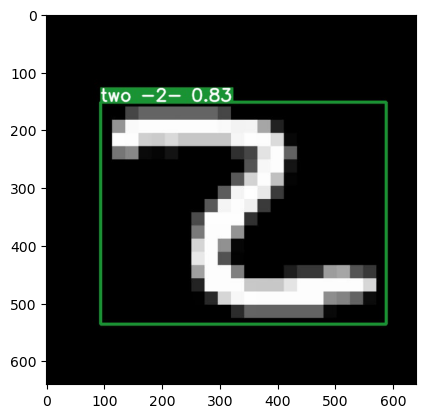

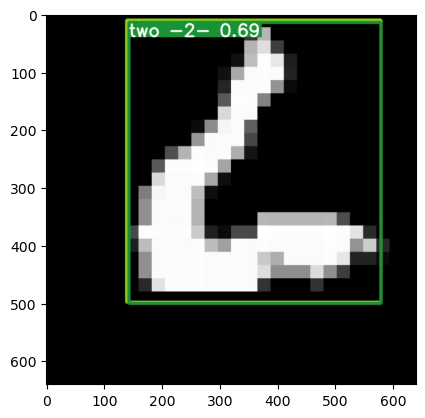

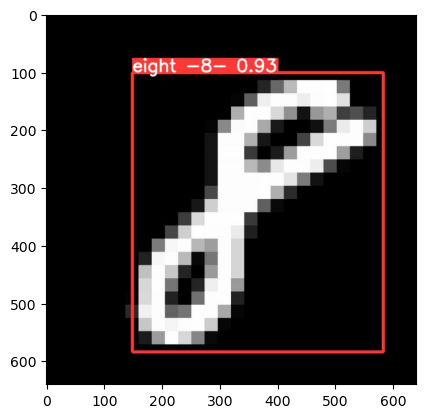

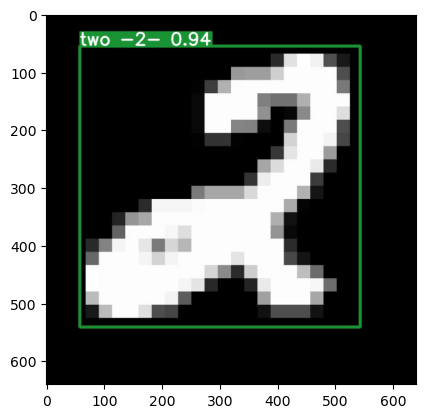

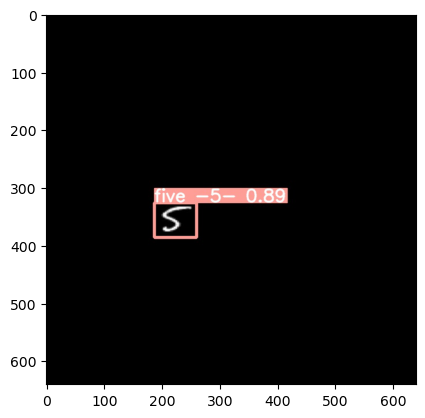

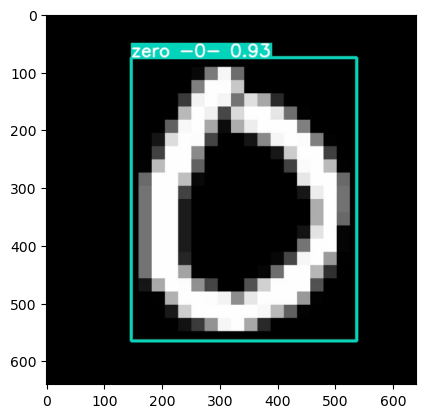

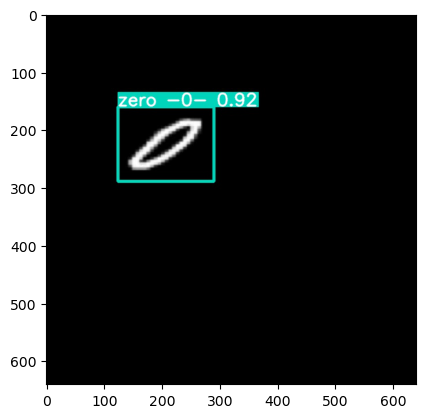

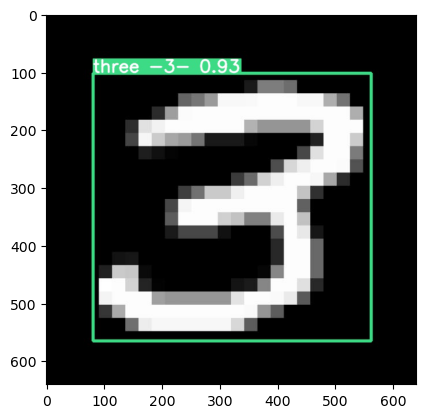

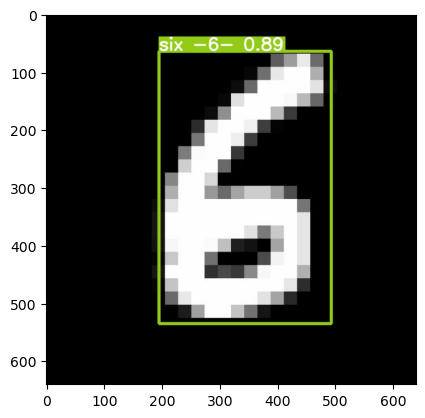

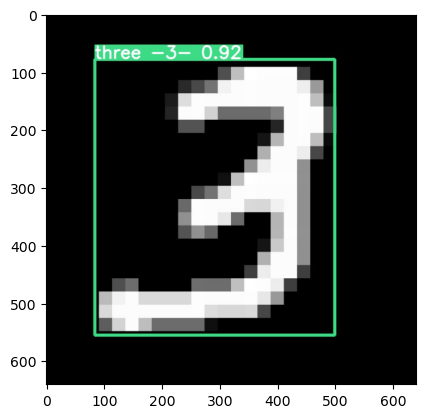

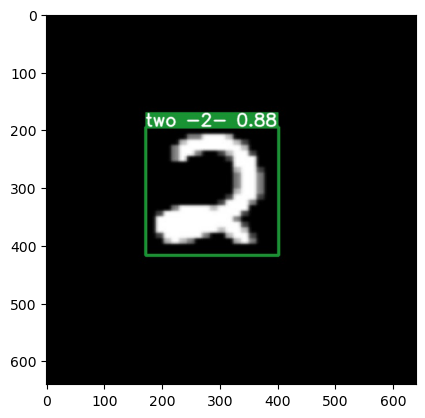

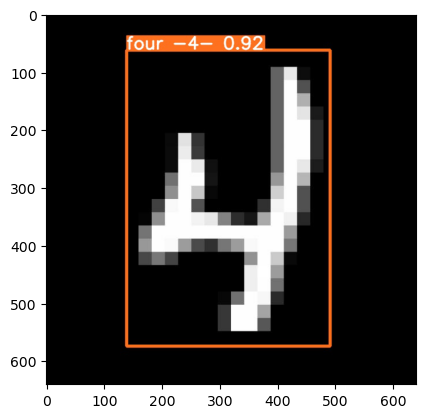

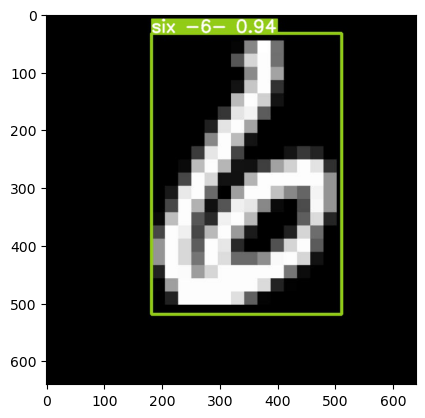

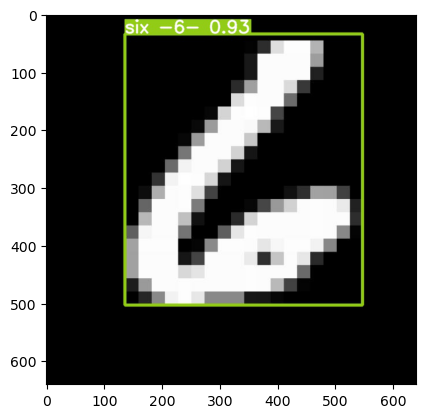

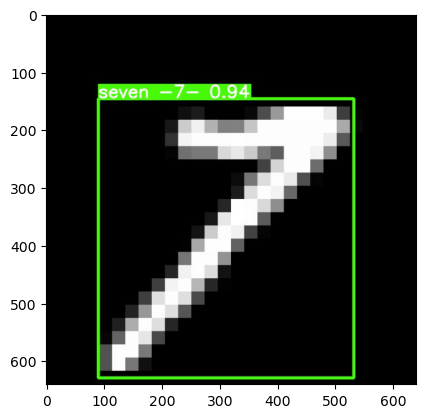

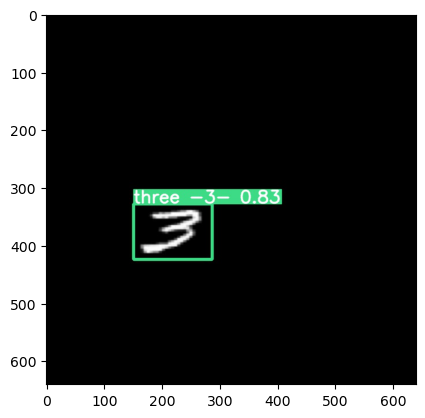

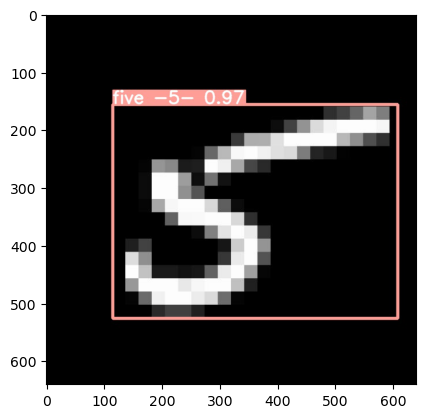

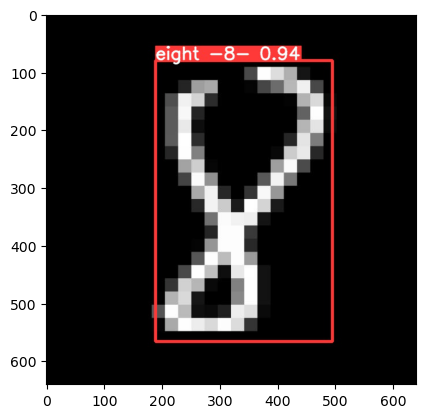

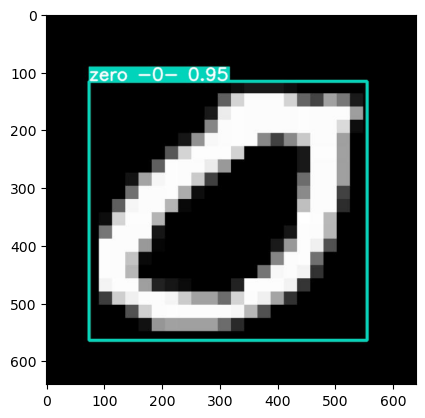

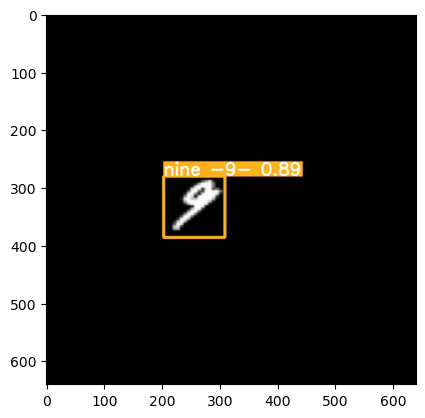

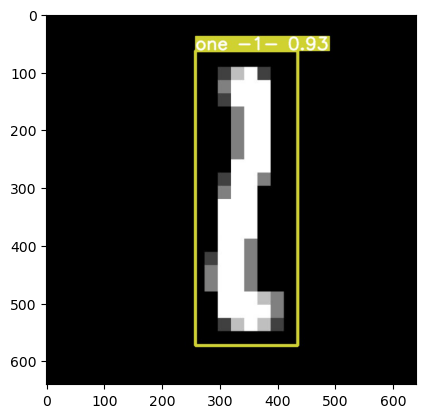

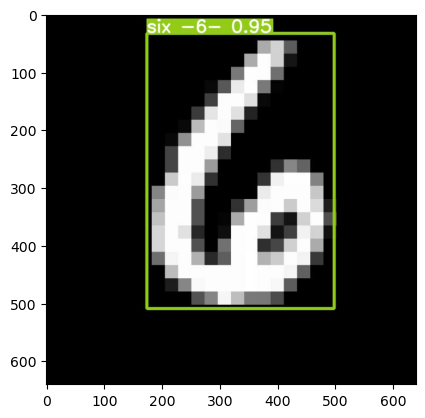

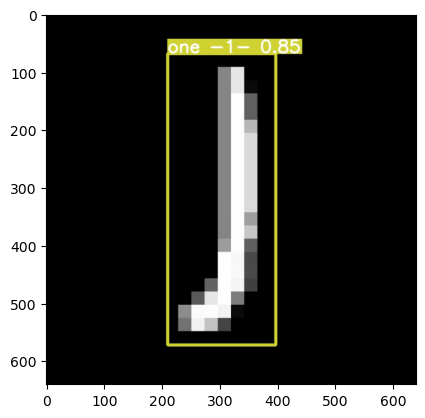

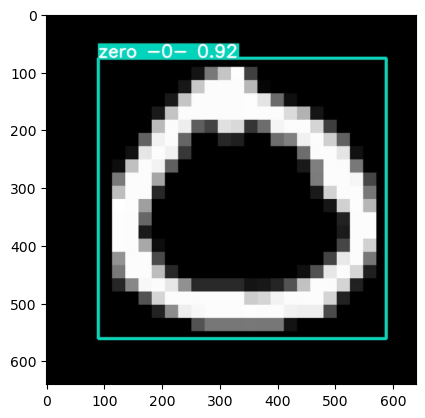

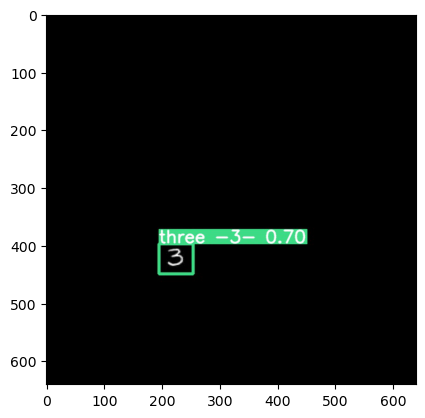

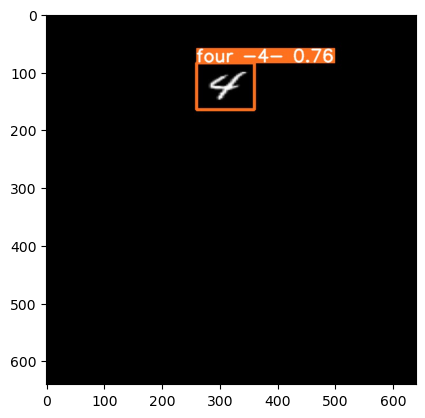

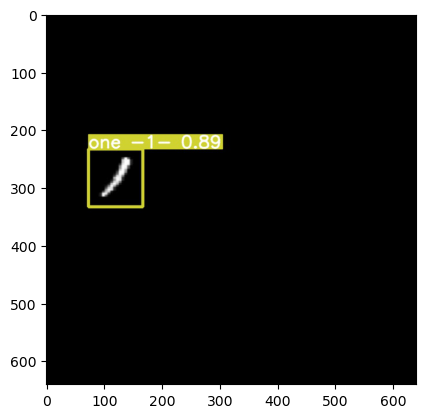

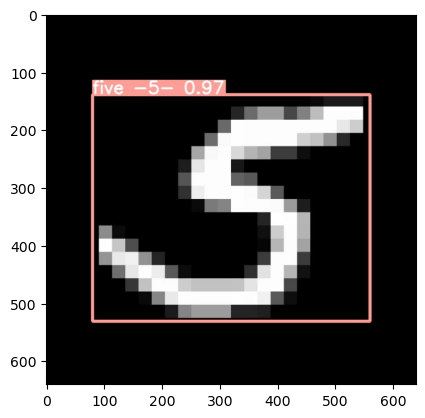

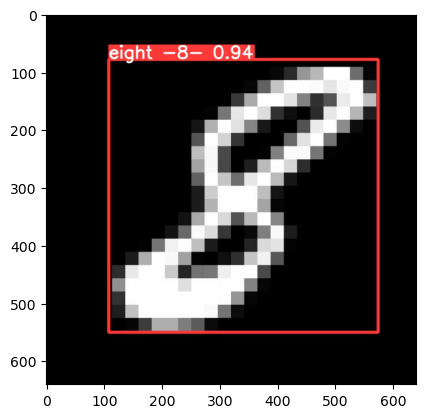

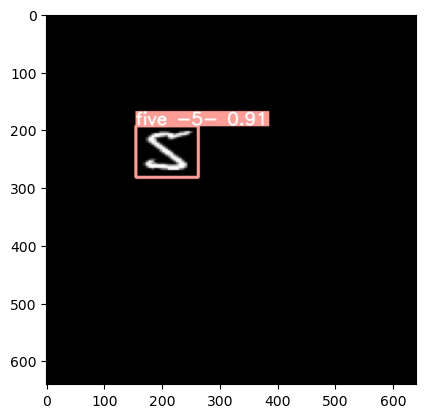

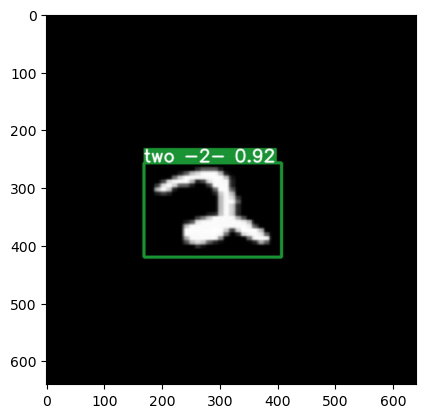

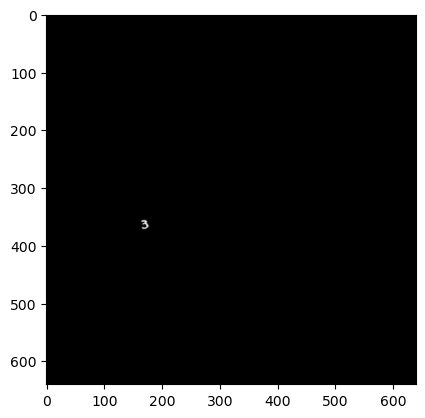

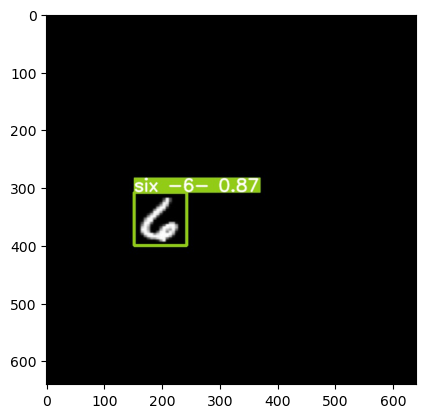

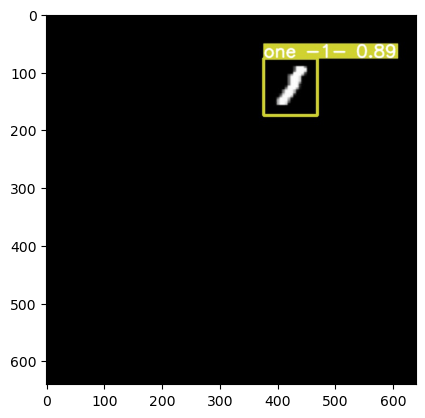

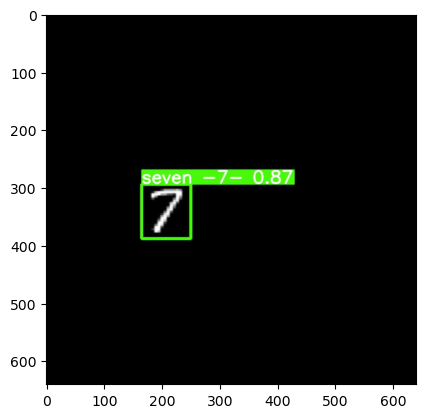

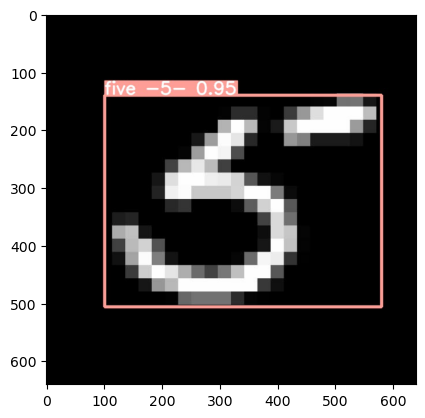

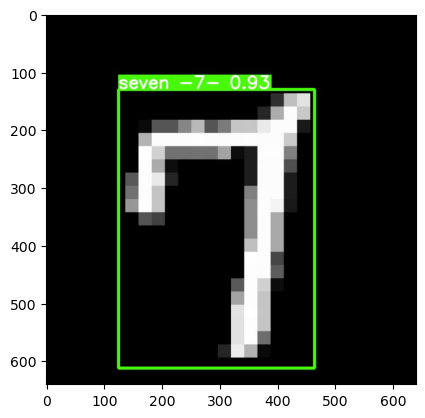

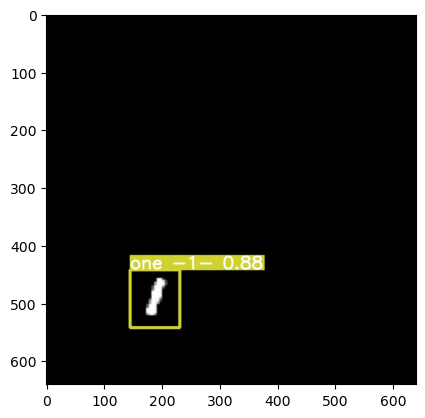

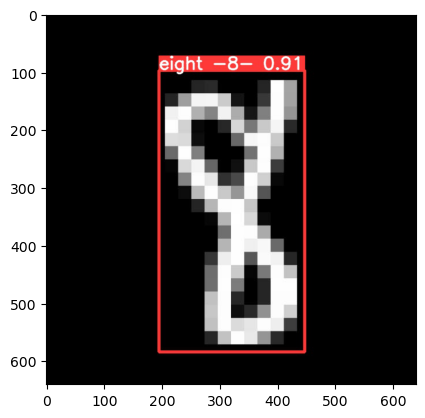

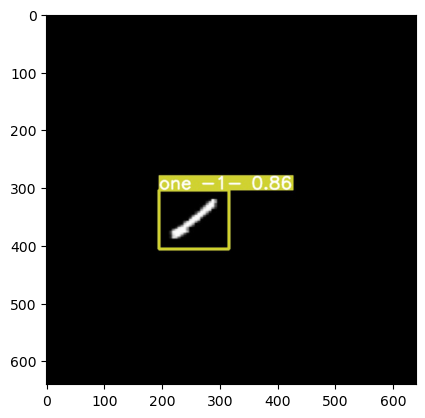

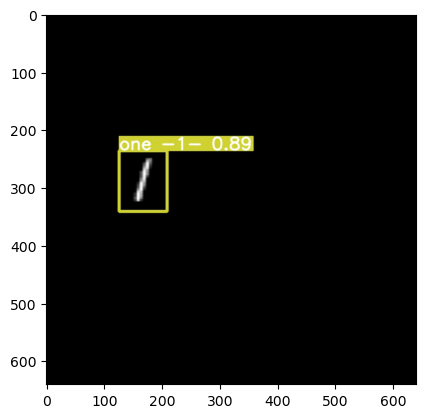

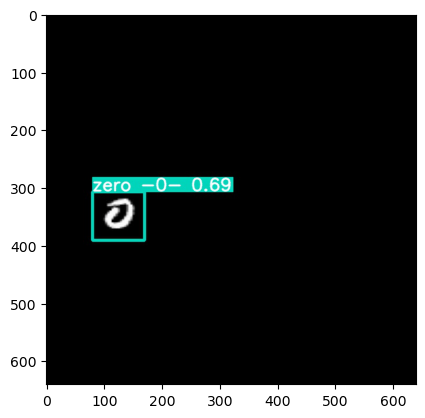

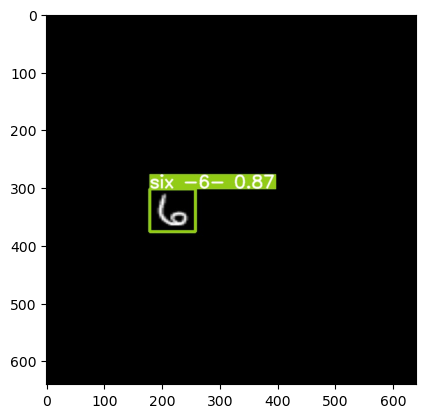

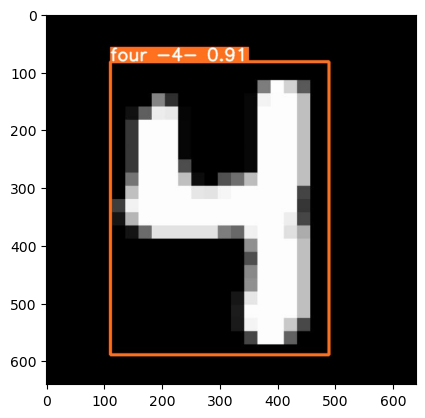

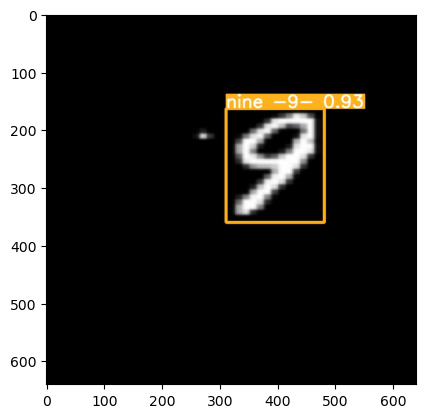

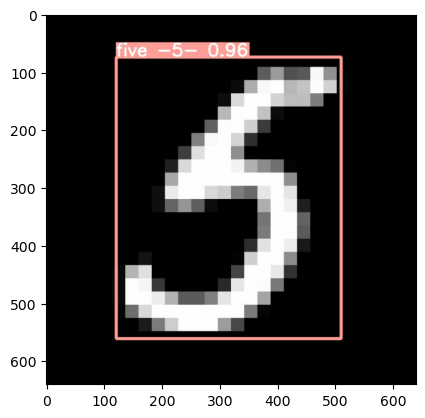

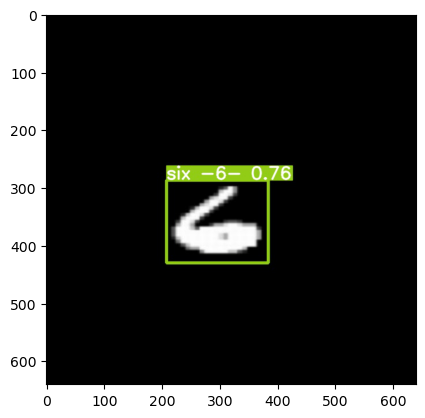

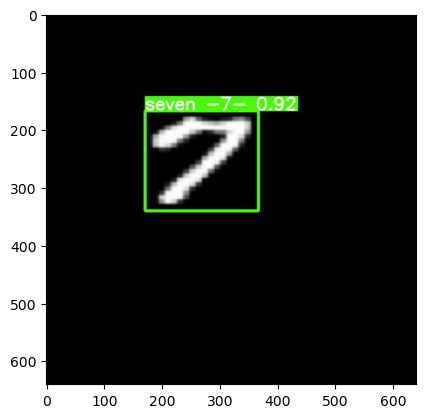

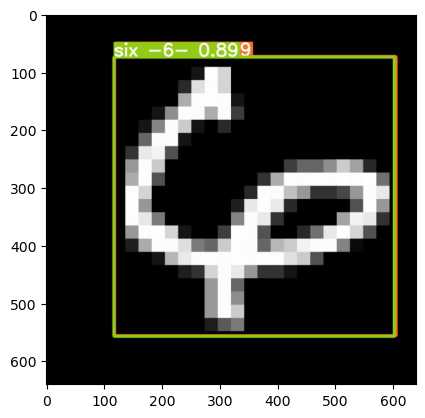

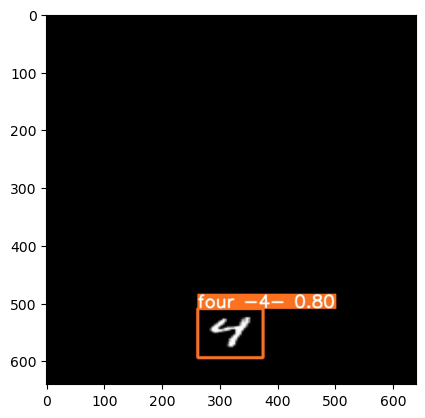

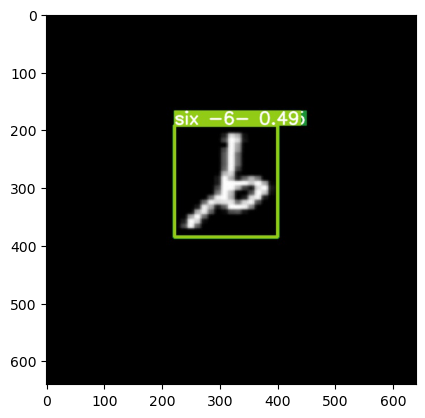

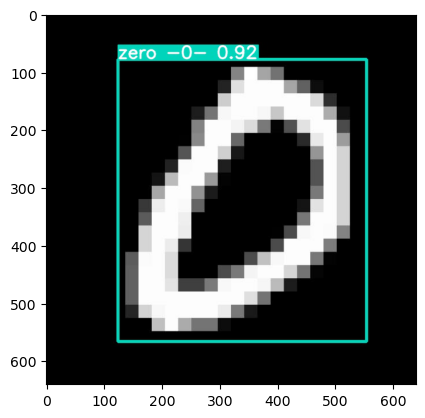

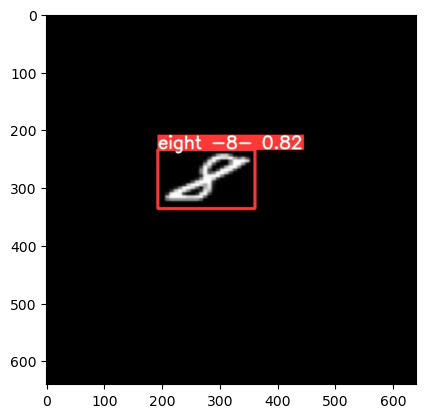

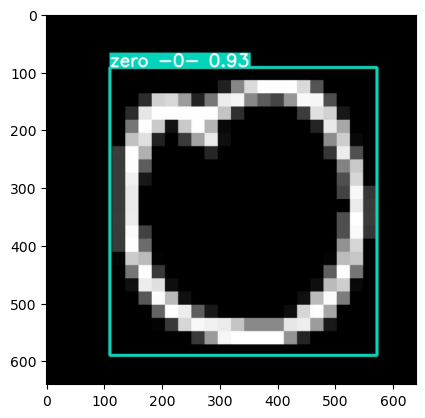

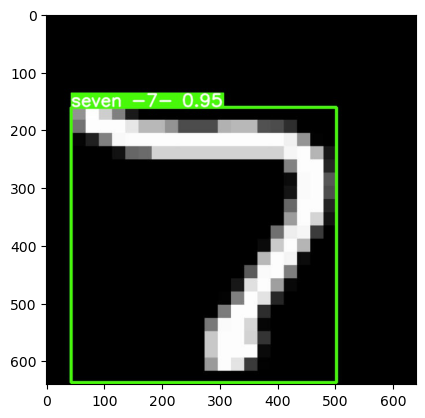

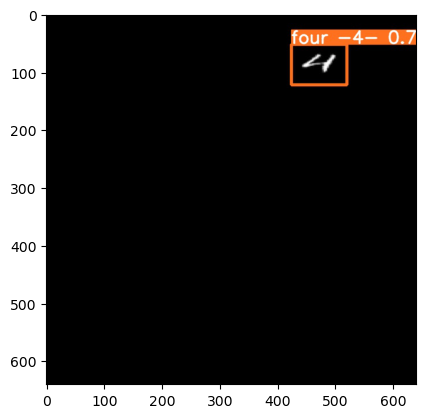

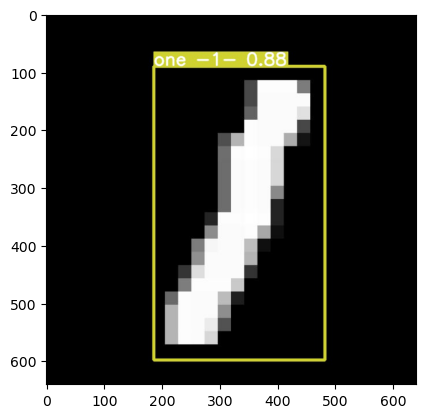

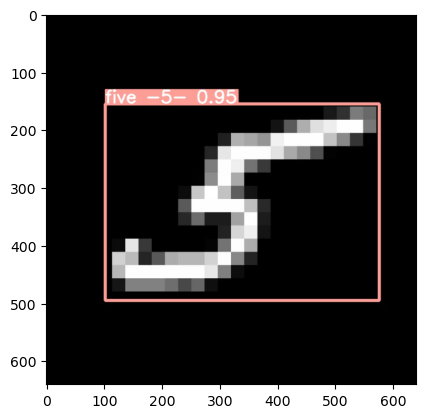

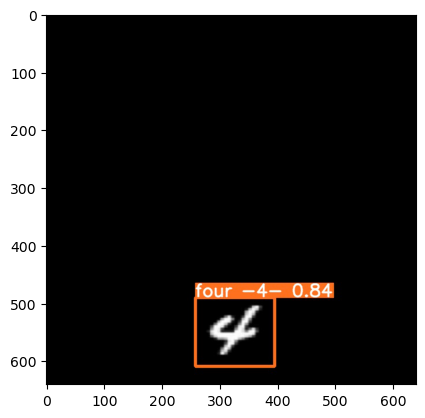

In [13]:
# shows the result of the test images
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename):
    image = mpimg.imread(filename)
    plt.figure()
    plt.imshow(image)

for filename in os.listdir('runs/detect/predict9'):
  process('runs/detect/predict9/' + filename)

True

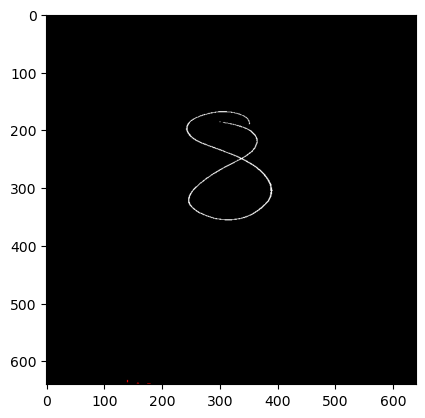

In [16]:
# converts image to black background and white digit
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('image.jpeg')
ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

img = cv2.resize(img, (640, 640), interpolation = cv2.INTER_AREA)

plt.imshow(img)
cv2.imwrite('image.jpeg', img)

In [10]:
# performs model on the image
!yolo task=detect mode=predict model=../../yolov8_weights/european/best.pt conf=0.25 source='image.jpeg' save=True

Ultralytics YOLOv8.0.41 🚀 Python-3.9.13 torch-1.13.1 CPU
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /Users/zeynepnuraksay/Desktop/final_year_project/zna2/hand_written_digits_recognition/ipynb_files/european/image.jpeg: 640x640 1 eight -8-, 1 four -4-, 1 nine -9-, 495.7ms
Speed: 1.6ms preprocess, 495.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict8


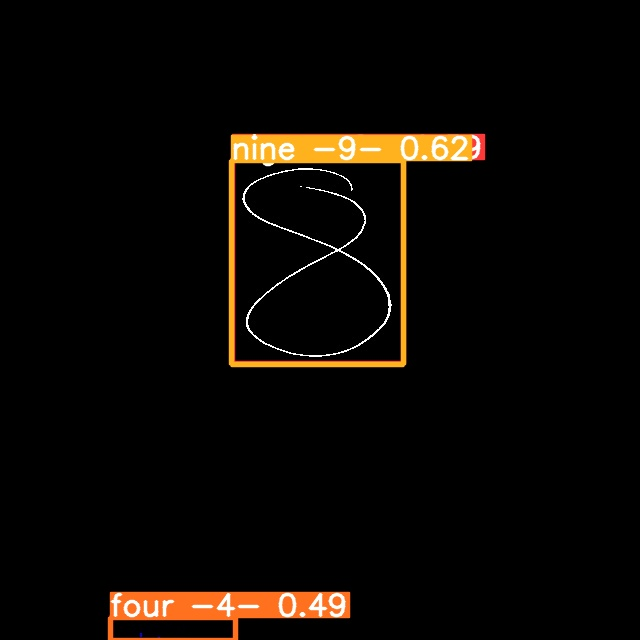

In [11]:
# shows the predictions
from IPython.display import Image, display
Image(filename='runs/detect/predict8/image.jpeg')